<a href="https://colab.research.google.com/github/KimBbaoro/KEB_toy/blob/master/keb4_1_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c costa-rican-household-poverty-prediction



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
 86% 2.00M/2.33M [00:00<00:00, 2.95MB/s]
100% 2.33M/2.33M [00:00<00:00, 2.91MB/s]


In [2]:
!unzip /content/costa-rican-household-poverty-prediction.zip


Archive:  /content/costa-rican-household-poverty-prediction.zip
  inflating: codebook.csv            
  inflating: codebook.xlsx           
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv               
  inflating: train.csv.zip           


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("fivethirtyeight")
#이 코드는 matplotlib 라이브러리의 rcParams를 설정하여 폰트 크기를 18로 변경하는 코드입니다. 
plt.rcParams["font.size"] = 18
plt.rcParams["patch.edgecolor"] = 'k'

In [4]:
pd.options.display.max_columns = 150
#DataFrame을 출력할 때 너무 많은 열이 출력되지 않도록 제한


train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


<Axes: >

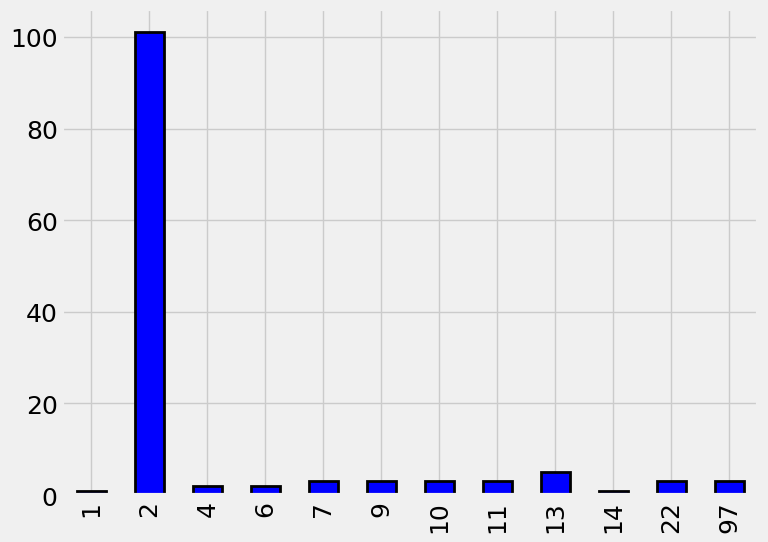

In [7]:
#이 코드는 pandas DataFrame에서 np.int64 타입을 가진 열(column)만 선택하여
# 그 열들의 고유한 값(unique value) 개수를 세고,
# 이를 개수별로 그룹화하여 막대그래프(bar plot)로 시각화하는 코드입니다.
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(
    color = "blue",
    figsize = (8,6),
    edgecolor = 'k',
    linewidth = 2
)

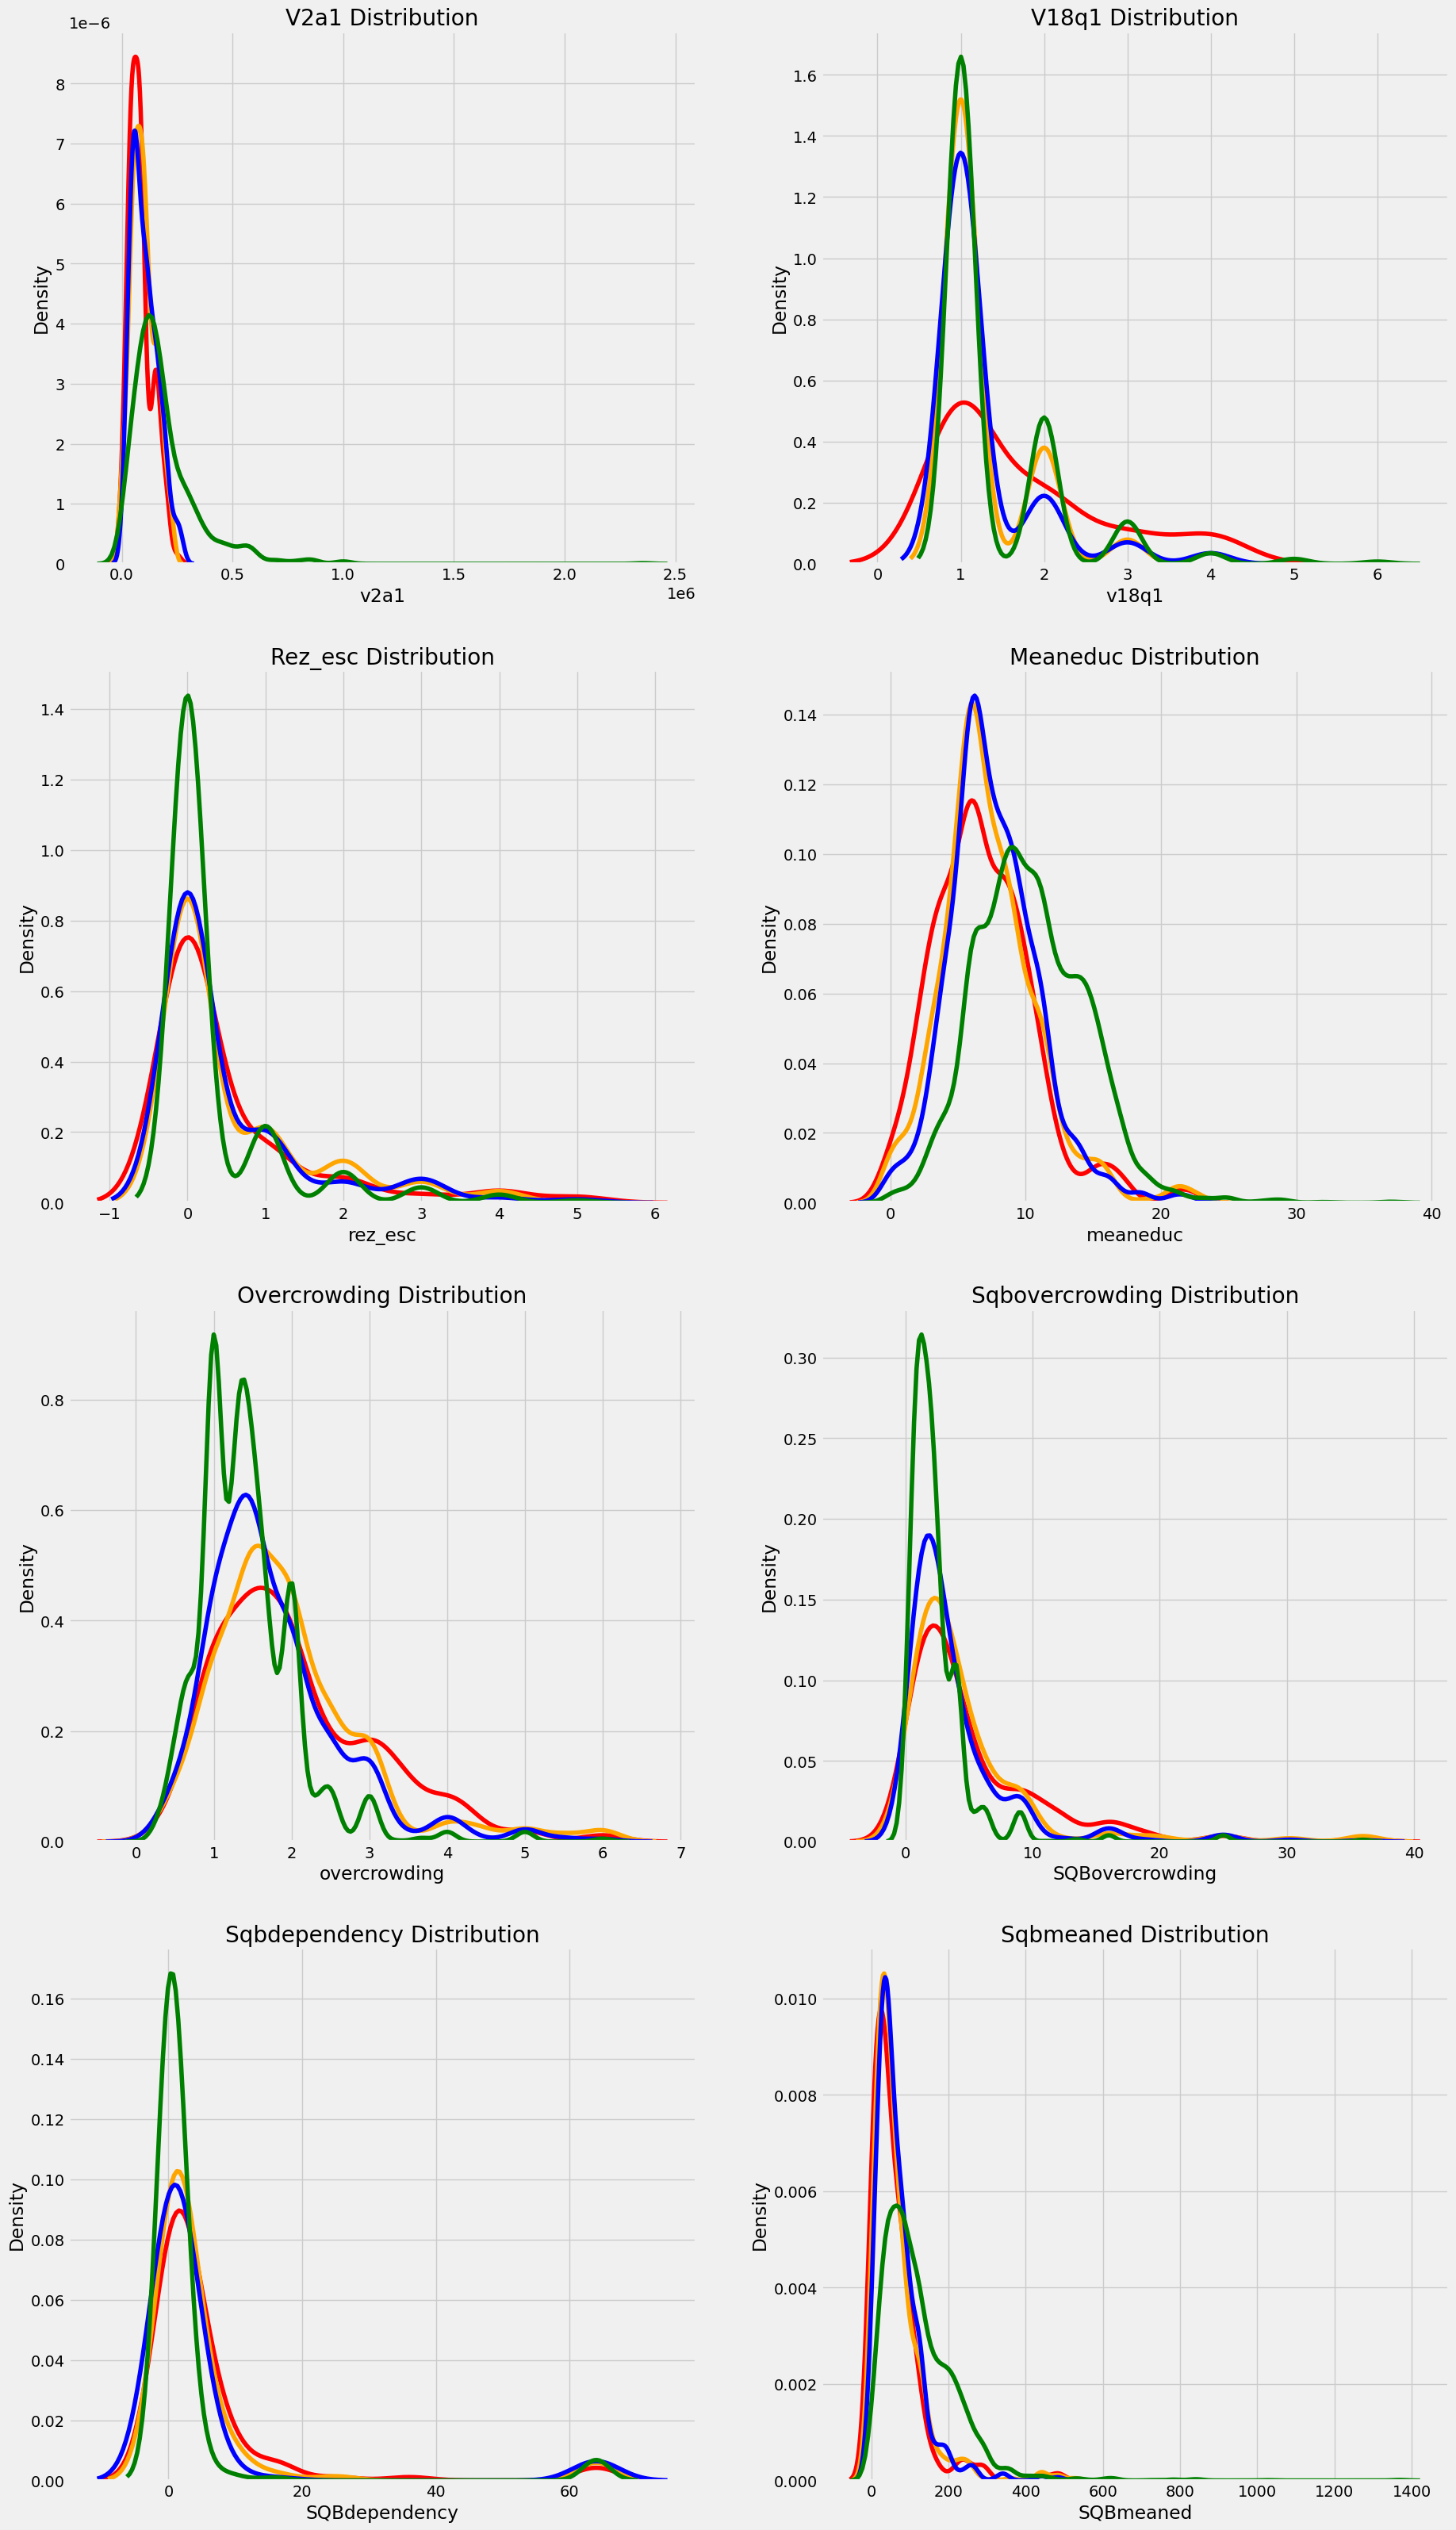

In [8]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [9]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [10]:
mapping = {"yes" : 1, "no" : 0}

for df in [train, test]:
  df["dependency"] = df['dependency'].replace(mapping).astype(np.float64)
  df["edjefa"] = df["edjefa"].replace(mapping).astype(np.float64)
  df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


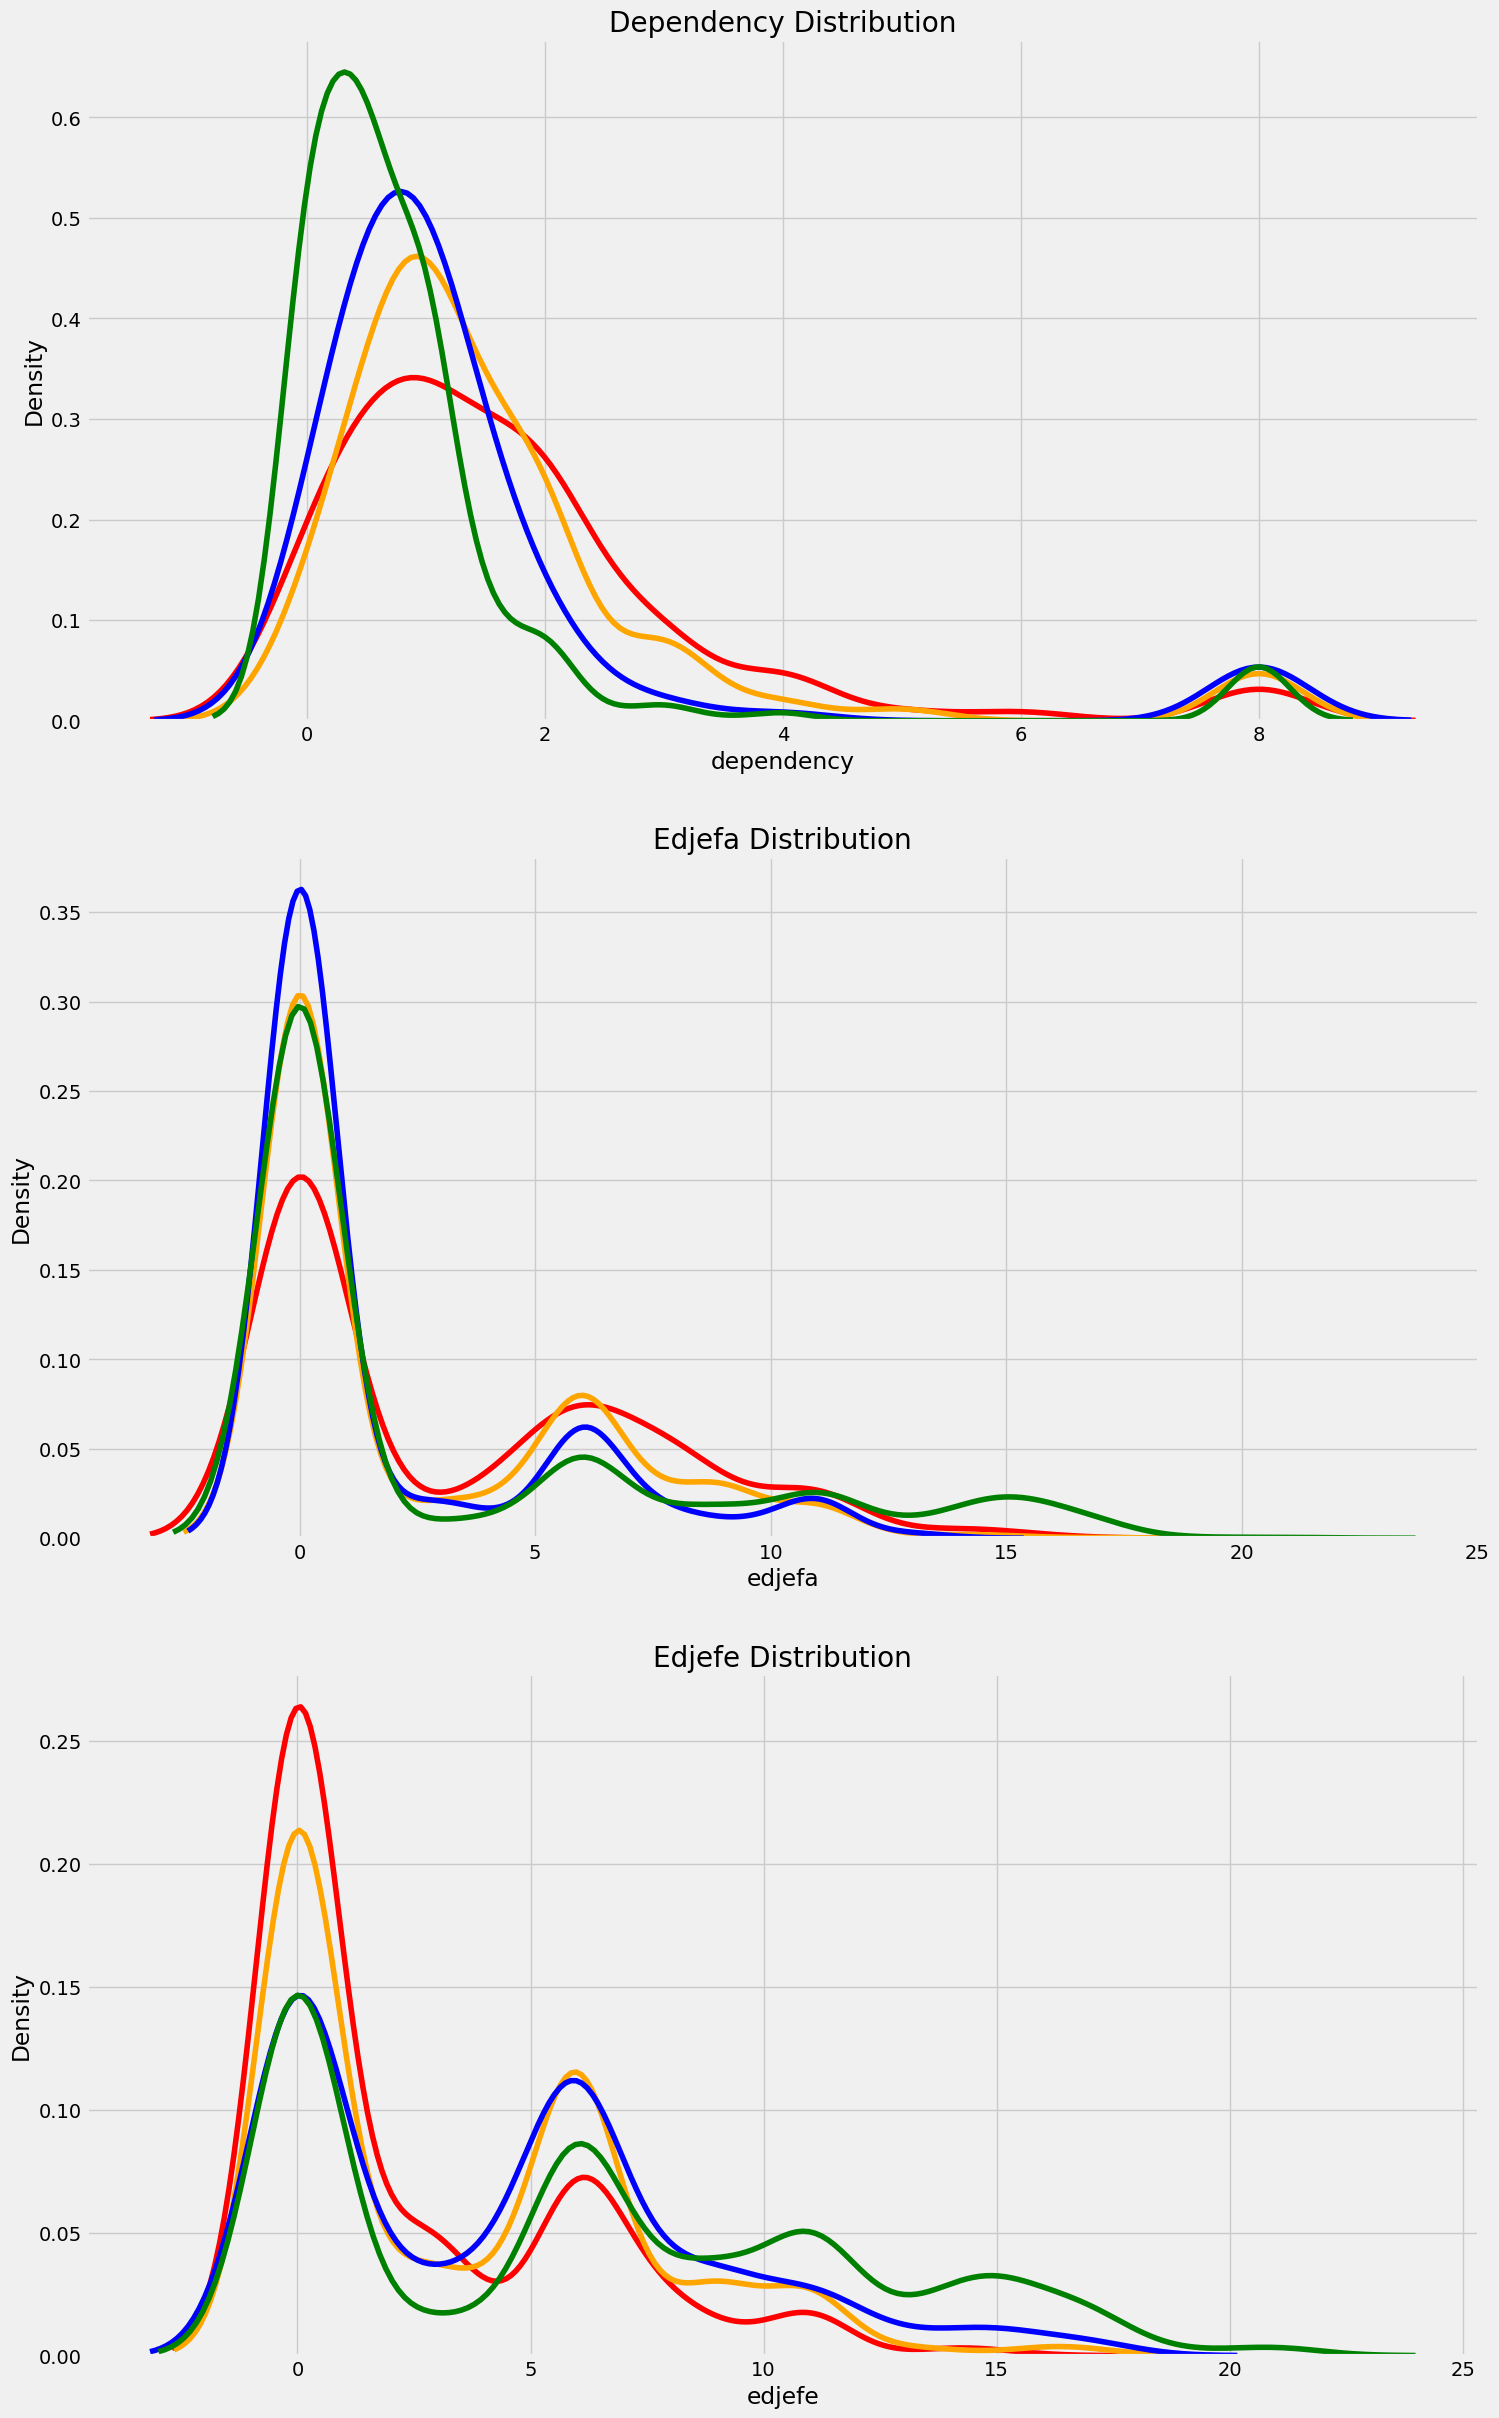

In [11]:
plt.figure(figsize = (16,12))

for i, col in enumerate(["dependency", "edjefa", "edjefe"]):
  ax = plt.subplot(3,1,i+1)
  for poverty_level, color in colors.items():
    sns.kdeplot(train.loc[train["Target"] == poverty_level, col].dropna(),
                ax= ax, color = color, label = poverty_mapping[poverty_level])
    
  plt.title(f'{col.capitalize()} Distribution');
  plt.xlabel(f'{col}');
  plt.ylabel("Density")

plt.subplots_adjust(top= 2)

In [12]:
test["Target"] = np.nan
data = train.append(test, ignore_index = True)
train.columns

<ipython-input-12-bfc0a806d603>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test, ignore_index = True)


Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

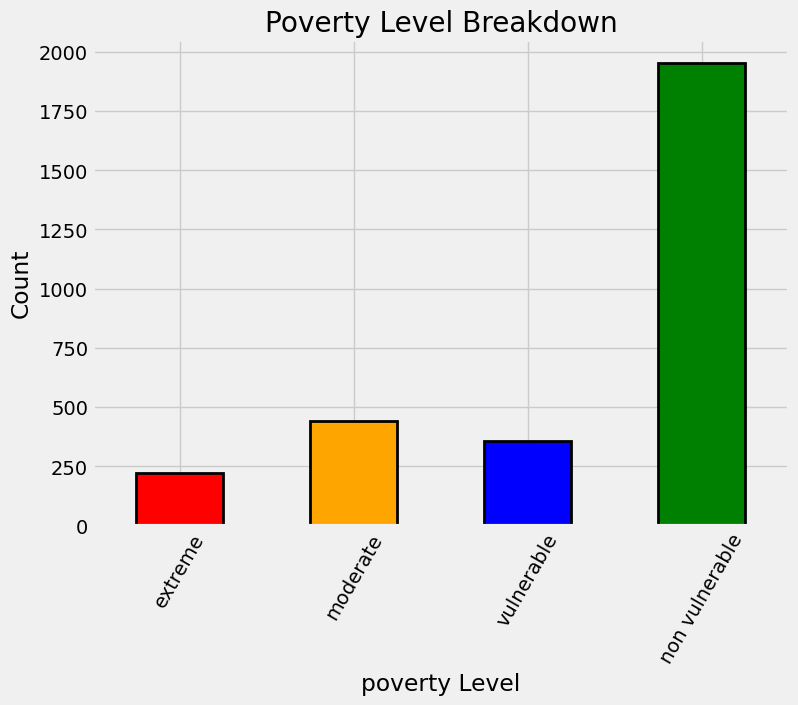

In [13]:
heads = data.loc[data["parentesco1"] == 1].copy()

train_labels = data.loc[(data["Target"].notnull()) & (data["parentesco1"] == 1), ["Target", 'idhogar']]
label_counts = train_labels["Target"].value_counts().sort_index()

label_counts.plot.bar(figsize = (8,6),
                      color = colors.values(), 
                      edgecolor = 'k',
                      linewidth = 2)

plt.xlabel("poverty Level")
plt.ylabel("Count")
plt.xticks([x-1 for x in poverty_mapping.keys()],
           list(poverty_mapping.values()),
           rotation = 60)
plt.title("Poverty Level Breakdown")

label_counts

In [14]:
all_equal = train.groupby("idhogar")["Target"].apply(lambda x:x.nunique() == 1)

not_equal = all_equal[all_equal !=True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [15]:
train[train["idhogar"] == not_equal.index[0]][["idhogar", "parentesco1", "Target"]]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [16]:
households_leader = train.groupby("idhogar")["parentesco1"].sum()
households_no_head = train.loc[train["idhogar"].isin(households_leader[households_leader == 0]. index),]
print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [17]:
households_no_head_equal = households_no_head.groupby('idhogar')["Target"].apply(lambda x:x.nunique() ==1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


In [18]:
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0:"total"})

missing["percent"] = missing["total"]/len(data)

missing.sort_values("percent", ascending = False).head(10).drop("Target")

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


In [19]:
def plot_value_counts(df, col, heads_only = False):
  if heads_only:
    df = df.loc[df["parentesco1"]== 1].copy()

  plt.figure(figsize = (8,6))
  df[col].value_counts().sort_index().plot.bar(color = "blue", edgecolor = "k", linewidth = 2)
  plt.xlabel(f'{col}')
  plt.title(f'{col} value counts ')
  plt.ylabel("Count")
  plt.show()

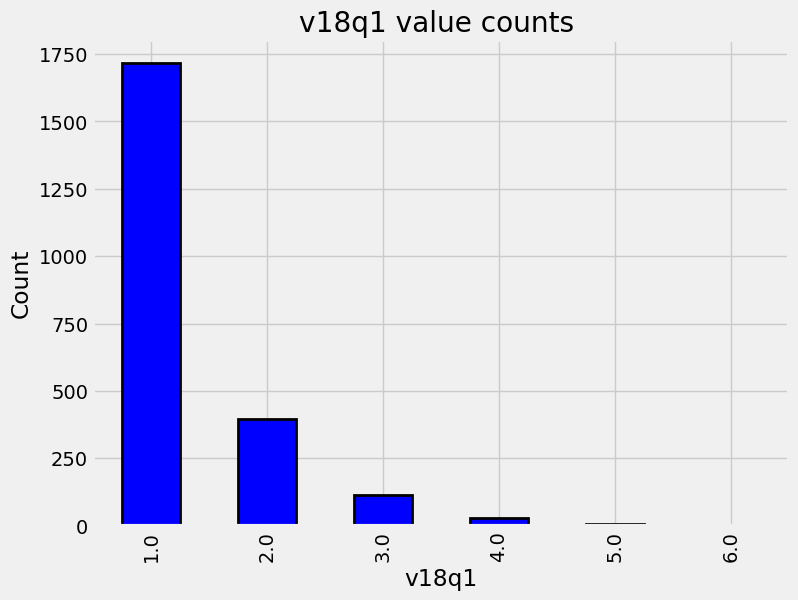

In [20]:
plot_value_counts(heads, 'v18q1')

In [21]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())


v18q
0    8044
1       0
Name: v18q1, dtype: int64

In [22]:
data['v18q1'] = data['v18q1'].fillna(0)

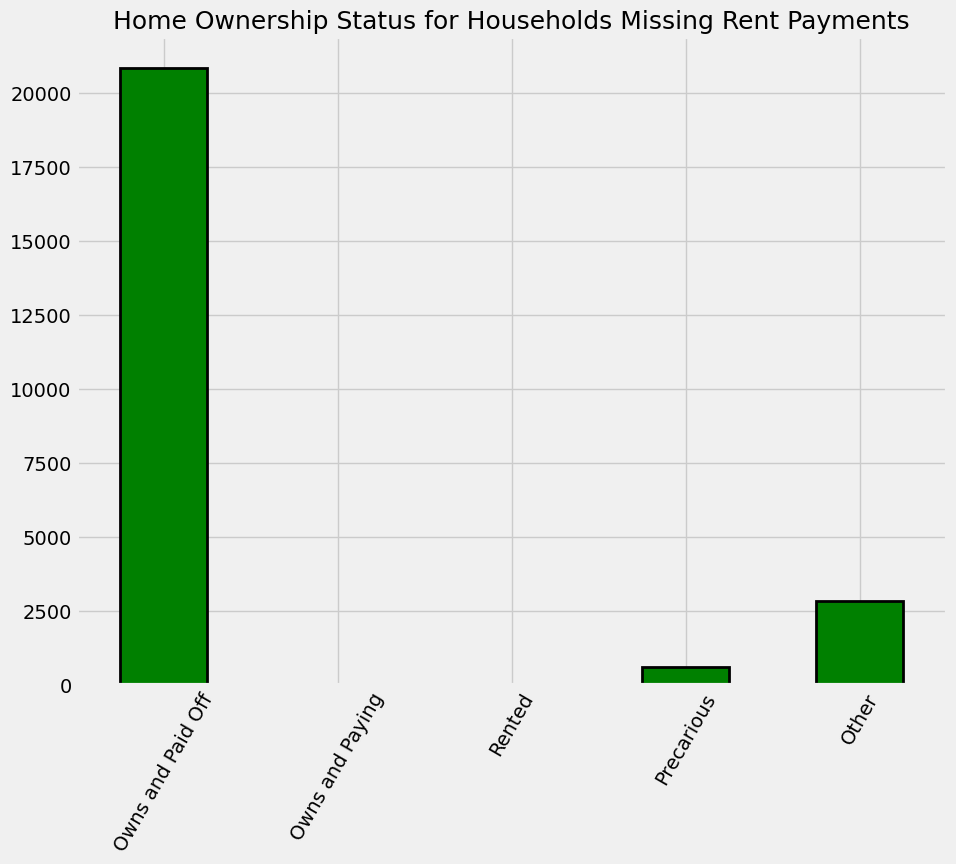

In [23]:

own_variables = [x for x in data if x.startswith('tipo')]
data.loc[data["v2a1"].isnull(), own_variables].sum().plot.bar(figsize = (10,8),
                                                              color = "green",
                                                              edgecolor = 'k', linewidth = 2)
plt.xticks([0,1,2,3,4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

In [24]:
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0
data["v2a1-missing"] = data['v2a1'].isnull()
data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

In [25]:
data.loc[data["rez_esc"].notnull()]["age"].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [26]:
data.loc[((data["age"] > 19) | (data["age"] < 7)) & (data["rez_esc"].isnull()), "rez_esc"] = 0
data['rez_esc_missing'] = data['rez_esc'].isnull()

In [27]:
data.loc[data['rez_esc'] > 5, "rez_esc"] = 5

In [28]:
def plot_categoricals(x,y, data, annotate = True):
  raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
  raw_counts = raw_counts.rename(columns = {x:"raw_count"})
  
  counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
  counts = counts.rename(columns = {x:"normalized_count"}).reset_index()
  counts["percent"] = 100*counts["normalized_count"]
  
  counts["raw_count"] = list(raw_counts["raw_count"])

  plt.figure(figsize = (14,10))
  plt.scatter(counts[x], counts[y], edgecolor = "k", color = "lightgreen",
              s = 100*np.sqrt(counts["raw_count"]), marker = 'o', alpha = 0.6, linewidth = 1.5)
  
  if annotate:
    for i, row in counts.iterrows():
      plt.annotate(xy = (row[x] - (1/counts[x].nunique()),
                         row[y] - (0.15/counts[y].nunique())),
                   color = "navy", s = f"{round(row['percent'], 1)}%")
      
  plt.yticks(counts[y].unique())
  plt.xticks(counts[x].unique())

  plt.legend(handles = markers, title = 'Counts',
              labelspacing = 3, handletextpad = 2,
              fontsize = 16,
              loc = (1.10, 0.19))
  plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)

  plt.annotate(f'* Size represents raw count while % is for a given y value.',
                xy = (0, 1), xycoords = 'figure points', size = 10)
  
  # Adjust axes limits
  plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
            counts[x].max() + (6 / counts[x].nunique())))
  plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
            counts[y].max() + (4 / counts[y].nunique())))
  plt.grid(None)
  plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

TypeError: ignored

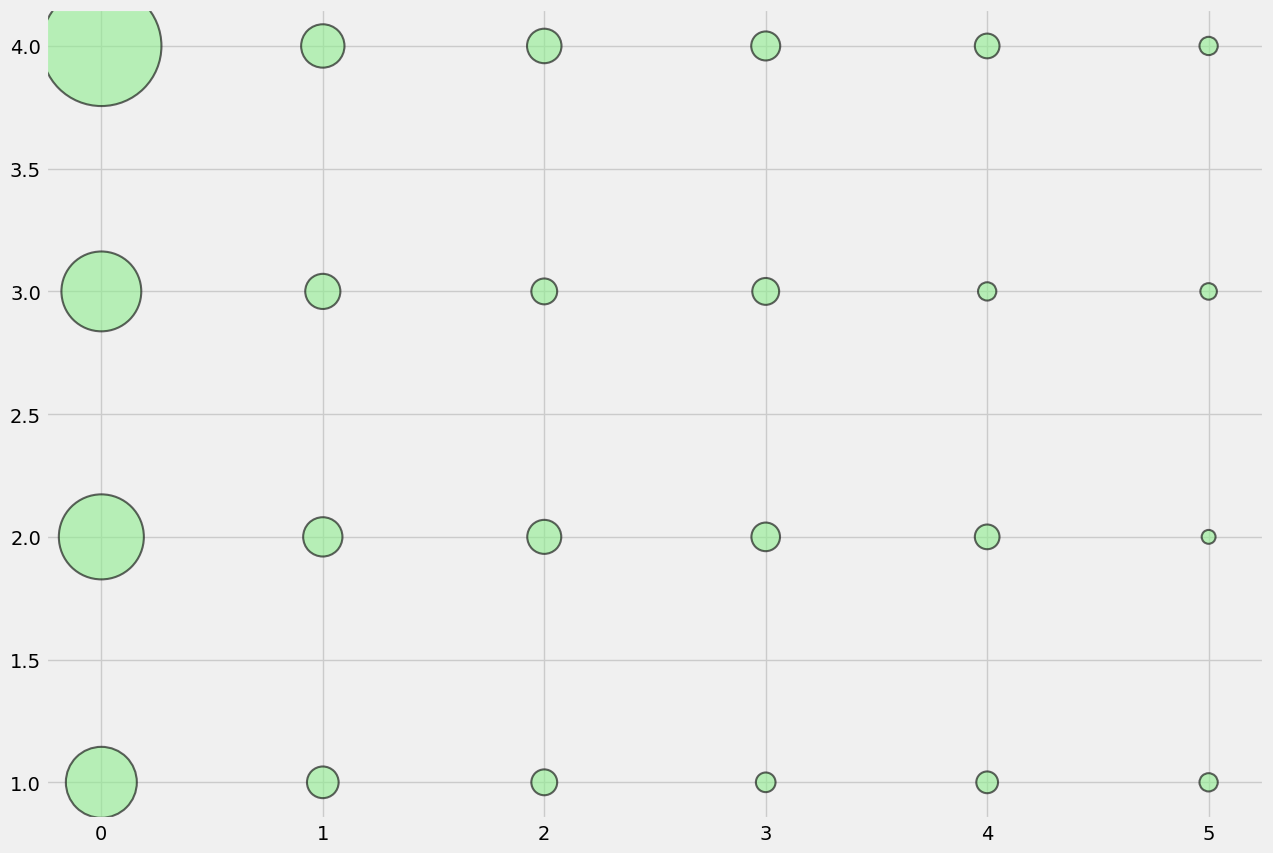

In [29]:
plot_categoricals("rez_esc", "Target", data, True)

In [ ]:
plot_categoricals("escolari", "Target", data, annotate = False)

In [ ]:
plot_value_counts(data[(data["rez_esc_missing"] == 1)], "Target")

In [ ]:
plot_value_counts(data[(data["v2a1-missing"] == 1)], "Target")

In [ ]:
id_ = ["Id", "idhogar", "Target"]

In [ ]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone'] # 'rez_esc-missing'

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']


sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [ ]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

In [ ]:


sns.lmplot(x = 'age', y = 'SQBage', data = data, fit_reg=False);
plt.title('Squared Age versus Age');

In [ ]:
data = data.drop(columns = sqr_)
data.shape

In [ ]:
heads = data.loc[data["parentesco1"] == 1,: ]
#hh_count는 도저히 오류를 못찾겠어서 일단 냅둡니다..

heads = heads[id_ + hh_bool + hh_count + hh_ordered]
heads.shape

In [30]:
corr_matrix = heads.corr()
#이 코드는 상관 행렬에서 대각선 아래 삼각형의 원소들을 True로,
# 그 외의 원소들을 False로 하는 boolean matrix를 만듭니다.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop                                                       

<ipython-input-30-0c55e61a56b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = heads.corr()
<ipython-input-30-0c55e61a56b5>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


['tamhog',
 'hhsize',
 'coopele',
 'female',
 'hogar_total',
 'meaneduc',
 'area2',
 'SQBescolari',
 'SQBage',
 'SQBdependency',
 'SQBmeaned',
 'agesq']

In [31]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,rez_esc,hhsize,hogar_total,SQBhogar_total
r4t3,1.000000,0.998287,0.910457,0.935585,0.998287,0.998287,0.944904
tamhog,0.998287,1.000000,0.909155,0.935585,1.000000,1.000000,0.946270
tamviv,0.910457,0.909155,1.000000,0.935585,0.909155,0.909155,0.866130
rez_esc,0.935585,0.935585,0.935585,1.000000,0.935585,0.935585,0.949596
hhsize,0.998287,1.000000,0.909155,0.935585,1.000000,1.000000,0.946270
hogar_total,0.998287,1.000000,0.909155,0.935585,1.000000,1.000000,0.946270
SQBhogar_total,0.944904,0.946270,0.866130,0.949596,0.946270,0.946270,1.000000


<Axes: >

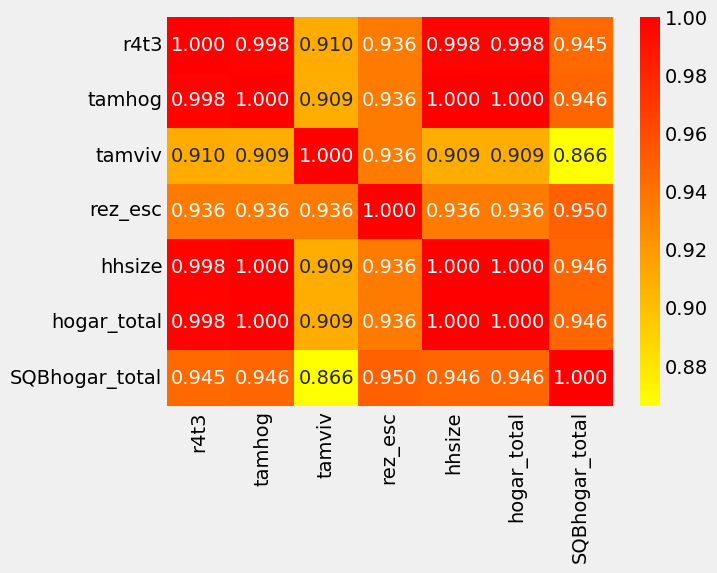

In [32]:
sns.heatmap(corr_matrix.loc[corr_matrix["tamhog"].abs() > 0.9, corr_matrix["tamhog"].abs() > 0.9],
            annot = True, cmap = plt.cm.autumn_r, fmt = ".3f")

In [33]:
heads = heads.drop(columns = ["tamhog", "hogar_total", "r4t3"])


Text(0.5, 1.0, 'Househod size vs number of persons living in the household')

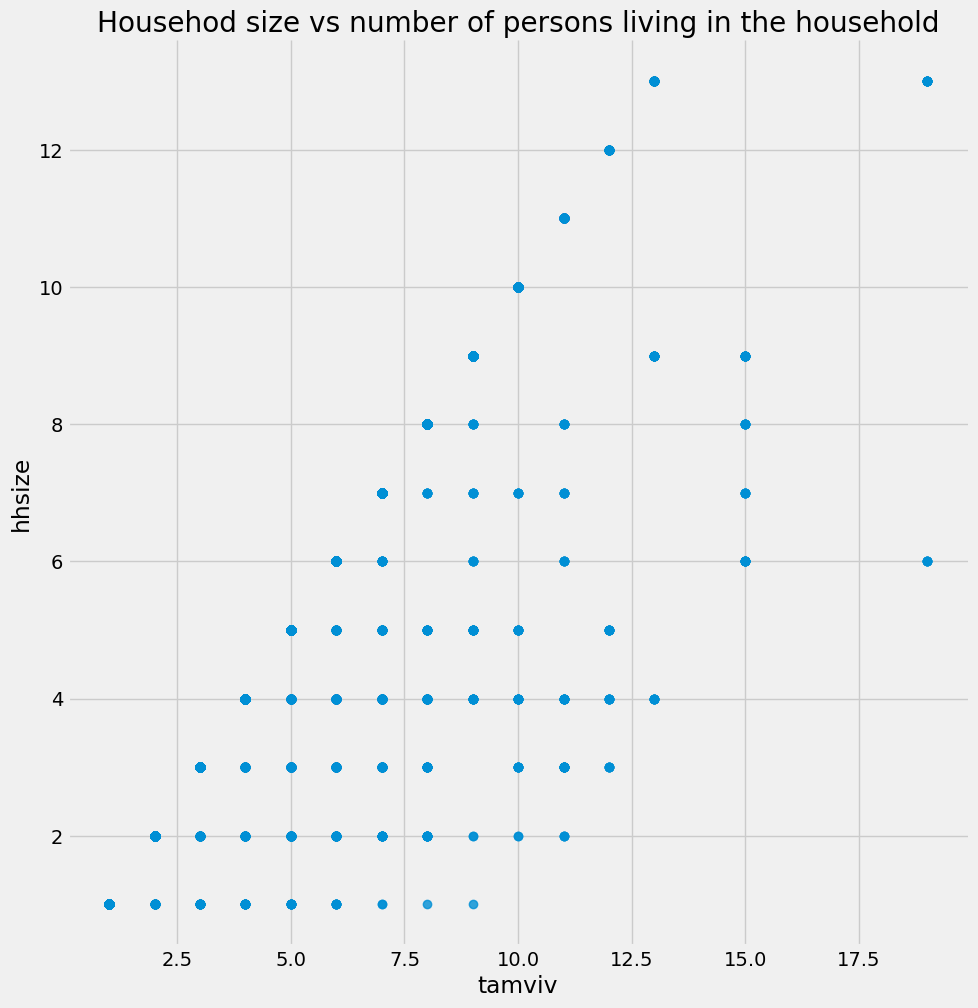

In [34]:
sns.lmplot(x = "tamviv", y = "hhsize", data = data, fit_reg = False, height = 10)
plt.title("Househod size vs number of persons living in the household")

TypeError: ignored

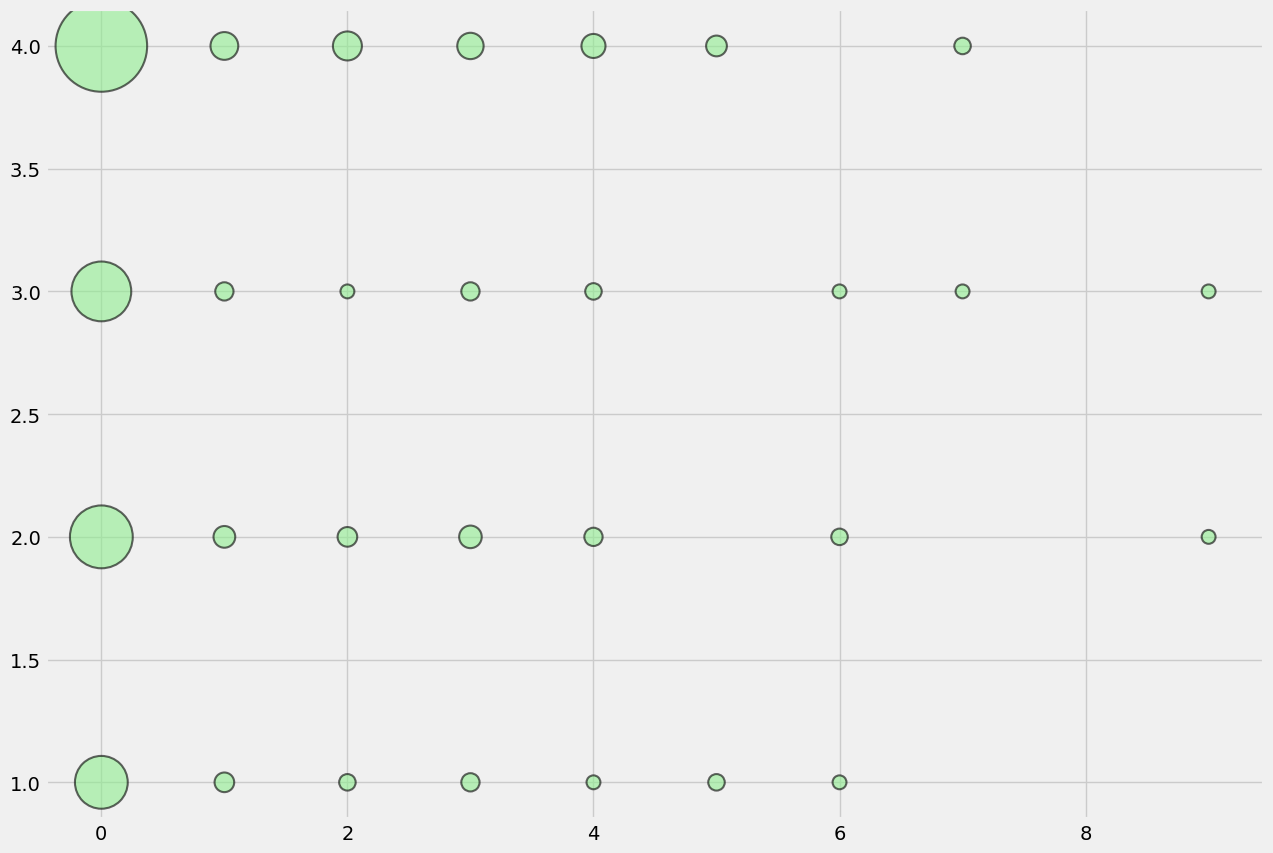

In [37]:
heads['hhsize-diff'] = heads["tamviv"] - heads["hhsize"]
plot_categoricals('hhsize-diff', "Target", heads)

In [39]:
corr_matrix.loc[corr_matrix["coopele"].abs() > 0.9, corr_matrix["coopele"]. abs() > 0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


In [40]:
elec = []

for i, row in heads.iterrows():
  if row["noelec"] == 1:
    elec.append(0)
  elif row["coopele"] == 1:
    elec.append(1)
  elif row["public"] == 1:
    elec.append(2)
  elif row["planpri"] == 1:
    elec.append(3)
  else:
    elec.append(np.nan)

heads["elec"] = elec
heads['elec-missing'] = heads["elec"].isnull()

TypeError: ignored

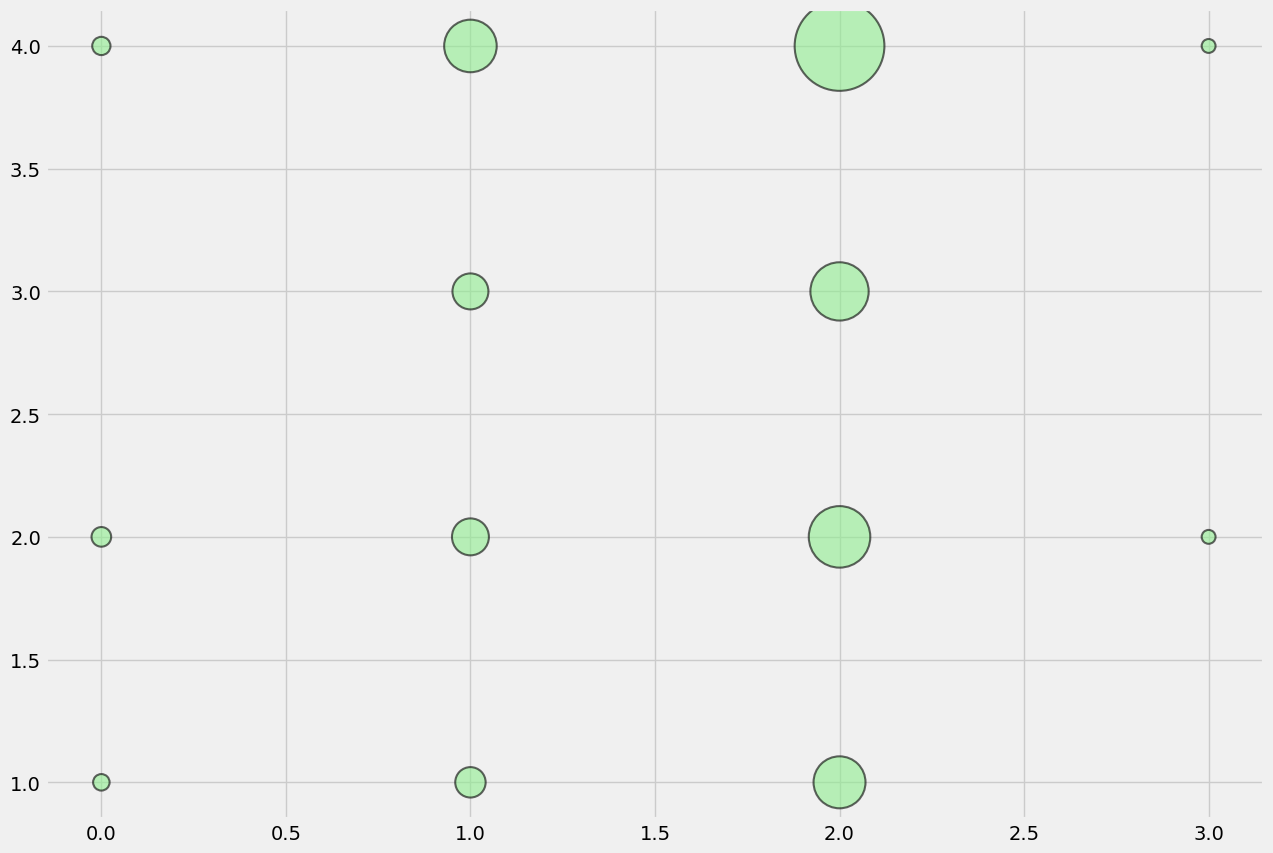

In [41]:
plot_categoricals("elec", "Target", heads)

In [42]:
#시골집 없애기
heads = heads.drop(columns = "area2")
heads.groupby("area1")["Target"].value_counts(normalize = True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

TypeError: ignored

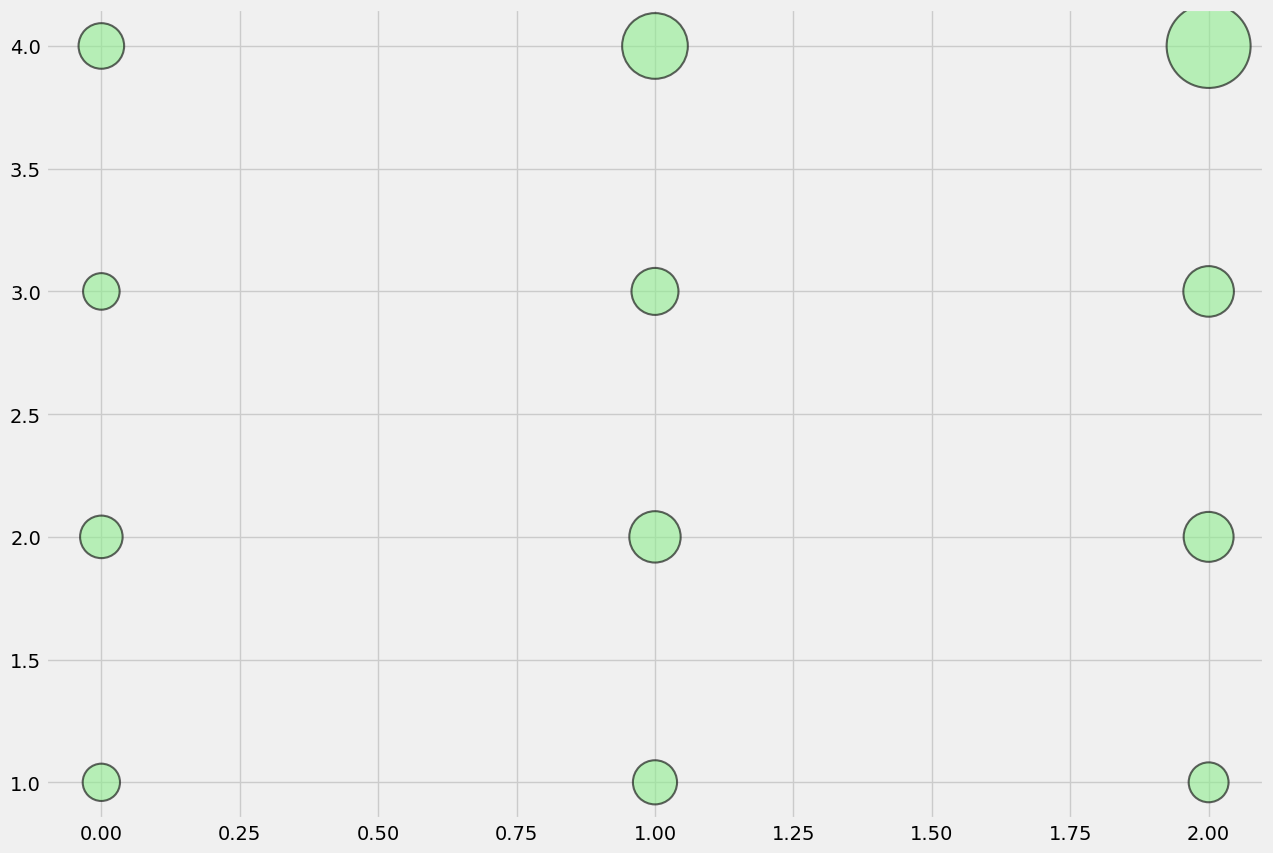

In [43]:
heads["walls"] = np.argmax(np.array(heads[["epared1", "epared2" ,"epared3"]]),
                           axis = 1)
plot_categoricals("walls" ,"Target" ,heads)

In [44]:
#제일 큰걸로 박고
heads["roof"] = np.argmax(np.array(heads[["etecho1", "etecho2", "etecho3"]]),
                        axis = 1)
#버리기
heads = heads.drop(columns = ["etecho1" ,"etecho2", "etecho3"])

heads["floor"] = np.argmax(np.array(heads[["eviv1", "eviv2", "eviv3"]]),
                        axis = 1)

NameError: ignored

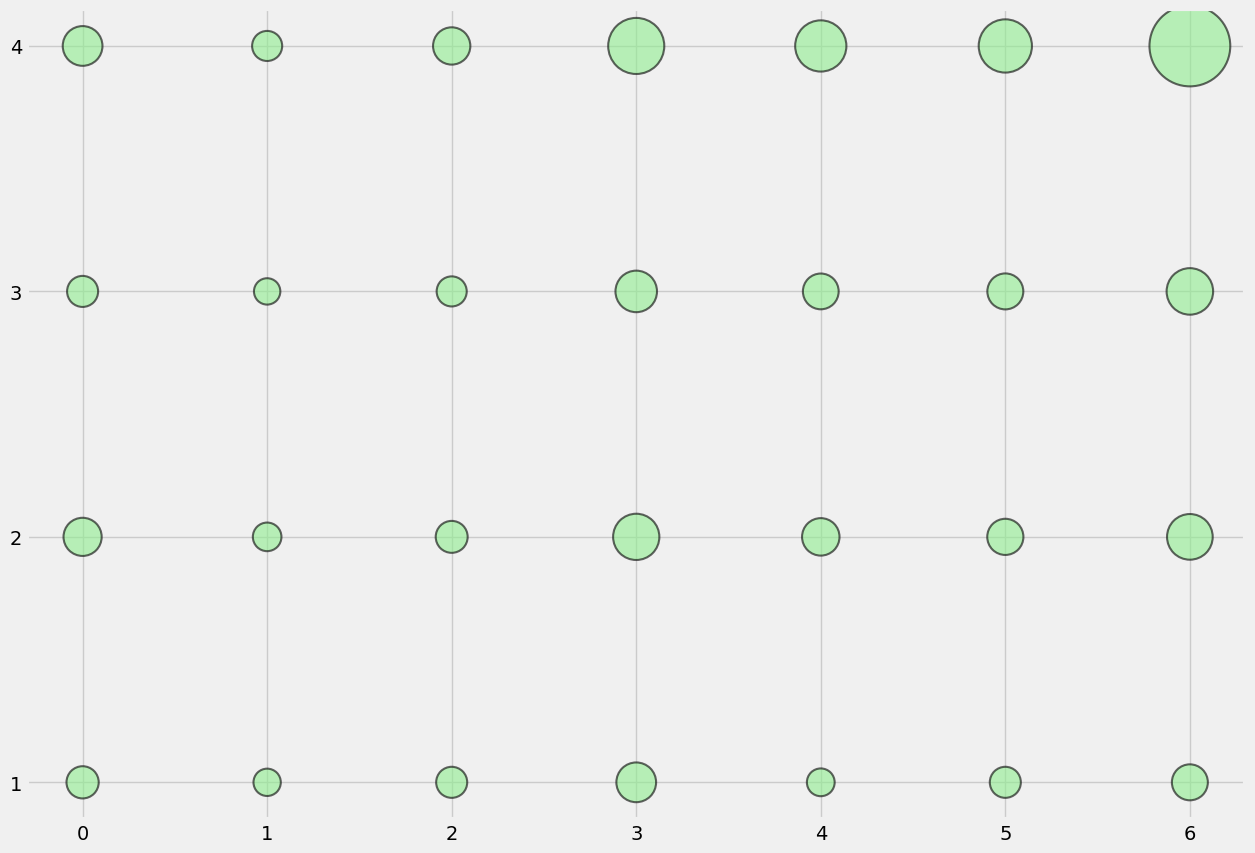

In [45]:
heads["walls + roof + floor"] = heads["walls"] + heads["roof"] + heads["floor"]

plot_categoricals("walls + roof + floor", "Target", heads, annotate=False)

In [46]:
#실행 돌릴 때 counts 좀 조작해보자. rename이 이해가 안되네..
counts = pd.DataFrame(heads.groupby(["walls+roof+floor"])["Target"].value_counts(
    normalize = True)).rename(columns ={"Target":"Normalized Count"}).reset_index()
counts.head()

KeyError: ignored

In [54]:
heads["warning"] = 1 *(
    heads["sanitario1"] +
    (heads["elec"] == 0) + 
    heads["pisonotiene"] +
    heads["abastaguano"] +
    (heads["cielorazo"] == 0)
)

Text(0.5, 1.0, 'Target vs Warning Variable')

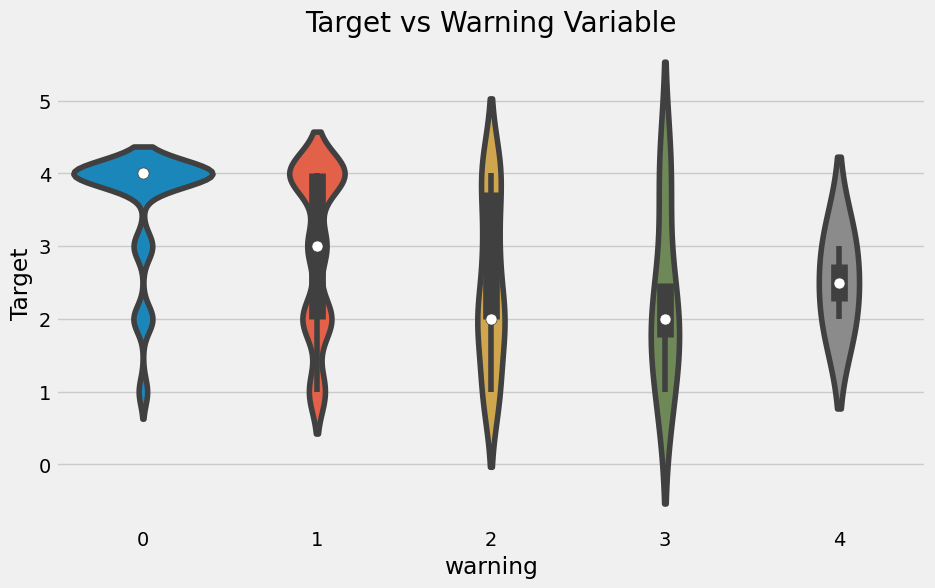

In [55]:
plt.figure(figsize = (10, 6))
sns.violinplot(x= "warning", y="Target", data = heads)
plt.title("Target vs Warning Variable")

TypeError: ignored

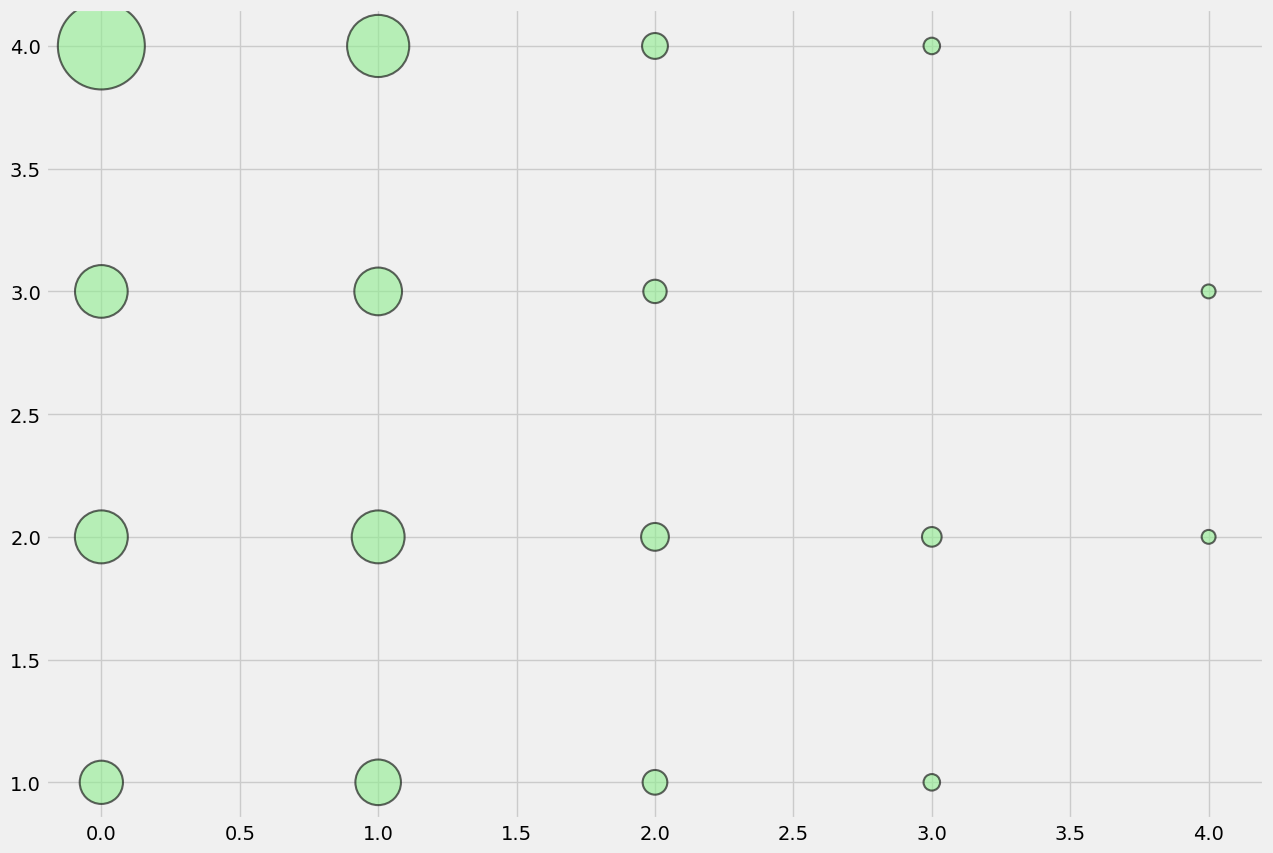

In [56]:
plot_categoricals("warning", "Target", data = heads)

Text(0.5, 1.0, 'Target vs Bonus Variable')

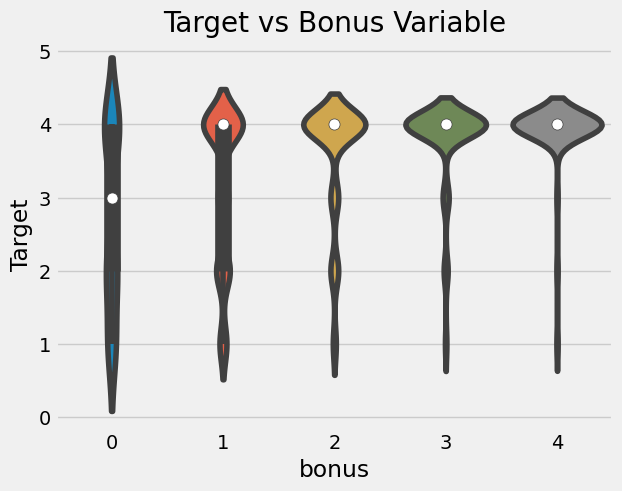

In [58]:
#이 그래프 의미가 뭐야...? target 4가 모든 bonus에서 높은데...?
heads["bonus"] = 1*(heads["refrig"] +
                    heads["computer"] +
                    (heads["v18q1"] > 0) +
                    heads["television"]
                    )

sns.violinplot(x = "bonus" , y = "Target", data = heads,
               figsize = (10,6))
plt.title("Target vs Bonus Variable")


In [59]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

In [60]:
#피어슨 상관 관계: -1에서 1까지 두 변수 간의 선형 관계를 측정합니다.
#스피어만 상관 관계: -1에서 1까지 두 변수 간의 단조 관계를 측정합니다.


In [61]:
from scipy.stats import spearmanr

In [62]:
def plot_corrs(x,y):
  spr = spearmanr(x,y).correlation
  pcr = np.corrcoef(x,y)[0,1]

  data = pd.DataFrame({"x" : x, "y" : y})
  plt.figure(figsize = (6,4))
  sns.regplot(x = "x", y = "y", data= data, fit_reg = False)
  plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');


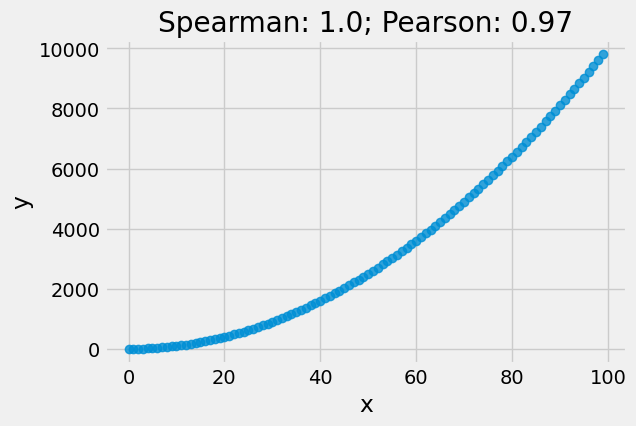

In [63]:
x = np.array(range(100))
y = x**2
plot_corrs(x,y)

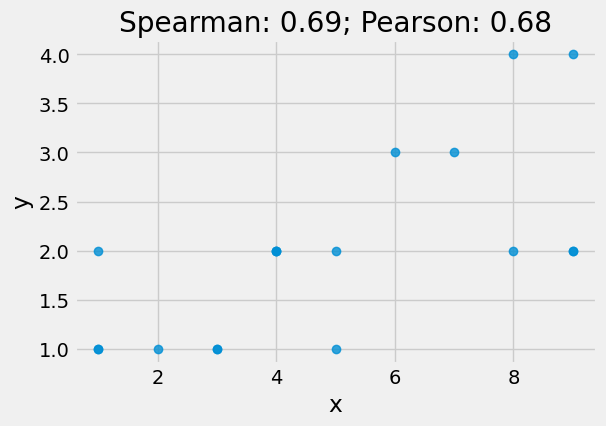

In [64]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

In [65]:
train_heads = heads.loc[heads["Target"].notnull(), :].copy()
pcorrs = pd.DataFrame(train_heads.corr()["Target"].sort_values()).rename(columns = 
                                                                         {"Target":"pcorr"}).reset_index()
pcorrs = pcorrs.rename(columns = {"index" : "feature"})
print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1      warnings -0.301791
2     hogar_nin -0.266309
3          r4t1 -0.260917
4  SQBhogar_nin -0.256824

Most positively correlated variables:
                  feature     pcorr
128           SQBescolari  0.314397
129  walls + roof + floor  0.332446
130              meaneduc  0.333652
131              escolari  0.333791
132                Target  1.000000


<ipython-input-65-f9e6b1c47be3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pcorrs = pd.DataFrame(train_heads.corr()["Target"].sort_values()).rename(columns =


In [66]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
#스피어만 상관계수 계산은 관련성의 유의성 수준을 나타내는 p-value와 함께 나옵니다.
# 보통 p-value가 0.05보다 작으면 관련성이 있는 것으로 간주됩니다
feats = []
scorr = []
pvalues = []

for c in heads:
  if heads[c].dtype !="object":
    feats.append(c)

    scorr.append(spearmanr(train_heads[c], train_heads["Target"]).correlation)
    pvalues.append(spearmanr(train_heads[c], train_heads["Target"]).pvalue)

scorrs = pd.DataFrame({"feature" : feats, "scorr":scorr, "pvalue" : pvalues}).sort_values("scorr")


In [67]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
           feature     scorr        pvalue
141        warning -0.307326  4.682829e-66
143       warnings -0.307326  4.682829e-66
130  SQBdependency -0.281516  2.792620e-55
92      dependency -0.281516  2.792620e-55
89       hogar_nin -0.236225  5.567218e-39

Most positive Spearman correlations:
                  feature     scorr        pvalue
144     phones-per-capita  0.337377  4.760104e-80
140  walls + roof + floor  0.338791  9.539346e-81
17               escolari  0.356491  8.429828e-90
124           SQBescolari  0.356491  8.429828e-90
133                Target  1.000000  0.000000e+00


In [68]:
corrs = pcorrs.merge(scorrs, on ="feature")
corrs['diff'] = corrs['pcorr'] - corrs["scorr"]
corrs.sort_values('diff').head()

,feature,pcorr,scorr,pvalue,diff
104,rooms-per-capita,0.152185,0.223303,6.521453e-35,-0.071119
128,SQBescolari,0.314397,0.356491,8.429828e-90,-0.042093
3,r4t1,-0.260917,-0.219226,1.112230e-33,-0.041691
126,phones-per-capita,0.299026,0.337377,4.760104e-80,-0.038351
8,r4m1,-0.209479,-0.171953,3.649343e-21,-0.037526


In [69]:
corrs.sort_values("diff").dropna().tail()

,feature,pcorr,scorr,pvalue,diff
113,edjefe,0.235687,0.214736,2.367521e-32,0.020951
114,SQBedjefe,0.242049,0.214736,2.367521e-32,0.027314
86,edjefa,0.052310,0.005114,7.804715e-01,0.047197
22,dependency,-0.126465,-0.281516,2.792620e-55,0.155051
48,SQBdependency,-0.054421,-0.281516,2.792620e-55,0.227094


Text(0.5, 1.0, 'Target vs dependency')

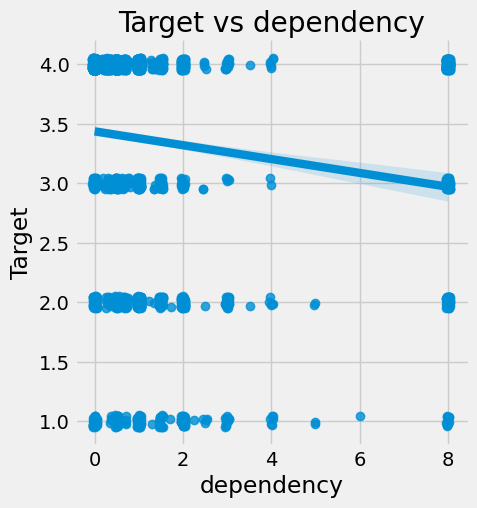

In [70]:
sns.lmplot(x ="dependency" ,y = "Target", fit_reg = True, data = train_heads, x_jitter = 0.05,
           y_jitter = 0.05)
plt.title("Target vs dependency")

Text(0.5, 1.0, 'Target vs Rooms Per Captita')

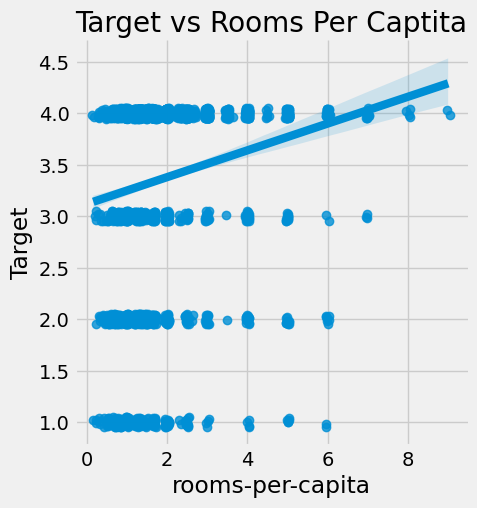

In [71]:
sns.lmplot(x = "rooms-per-capita", y= "Target", fit_reg = True, data = train_heads,
           x_jitter = 0.05, y_jitter=0.05)
plt.title("Target vs Rooms Per Captita")


<Axes: >

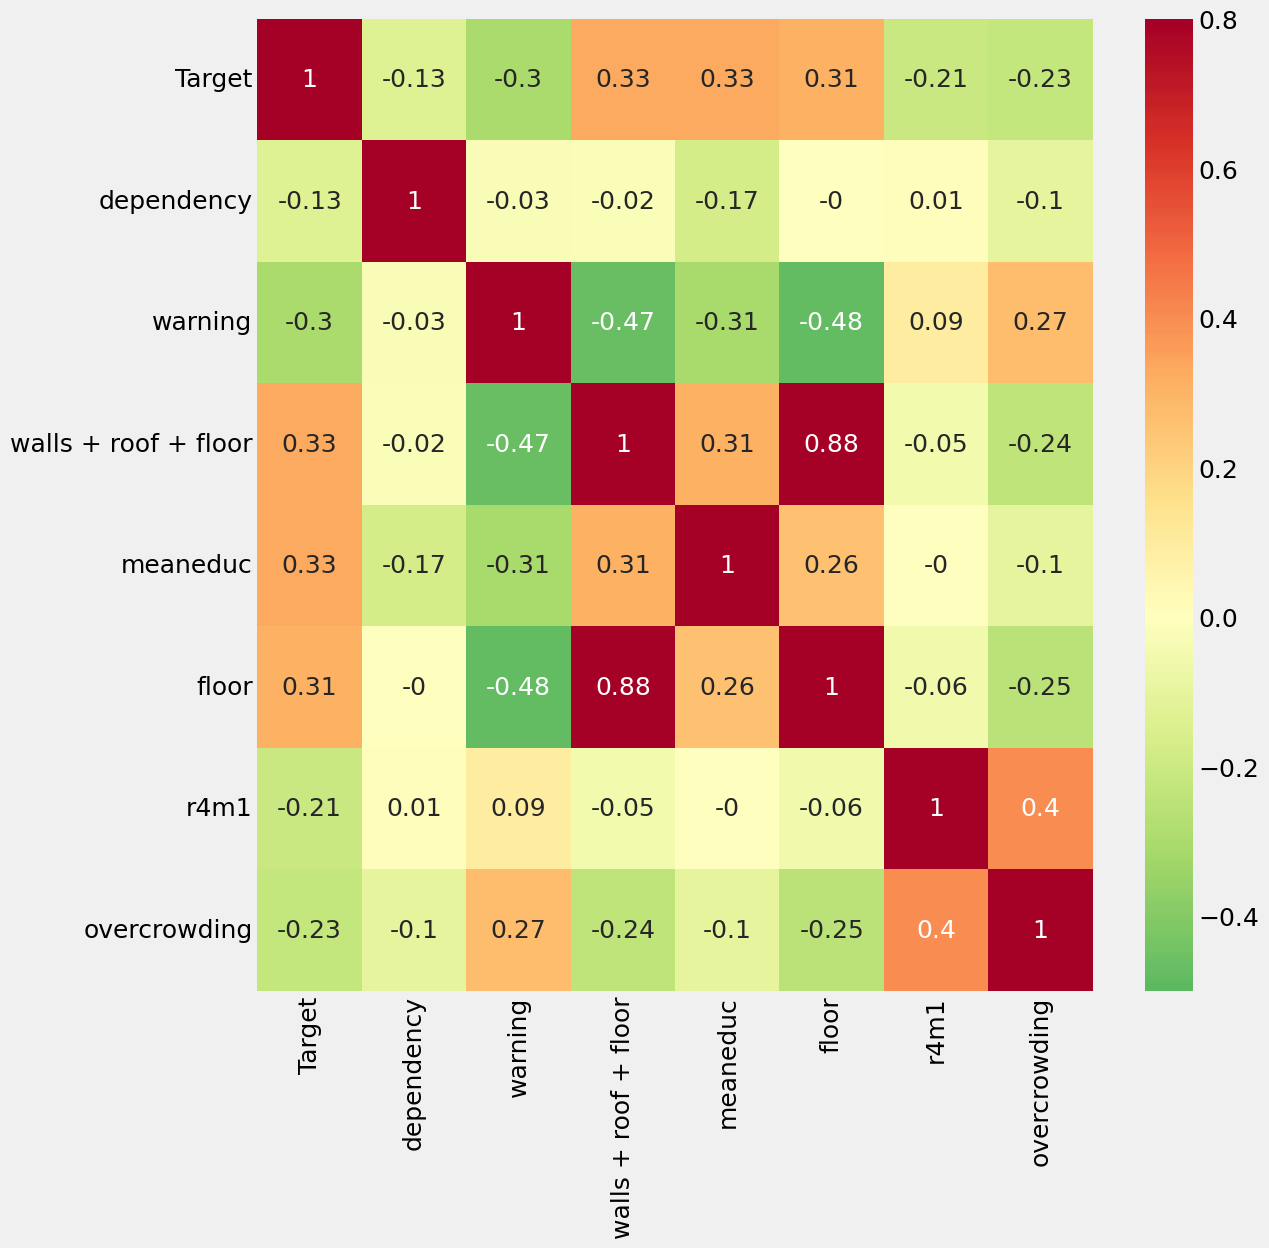

In [72]:
variables = ["Target", "dependency", "warning", "walls + roof + floor", "meaneduc",
             "floor", "r4m1", "overcrowding"]

corr_mat = train_heads[variables].corr().round(2)

plt.rcParams["font.size"] = 18
plt.figure(figsize = (12,12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0, cmap = plt.cm.RdYlGn_r, annot = True)

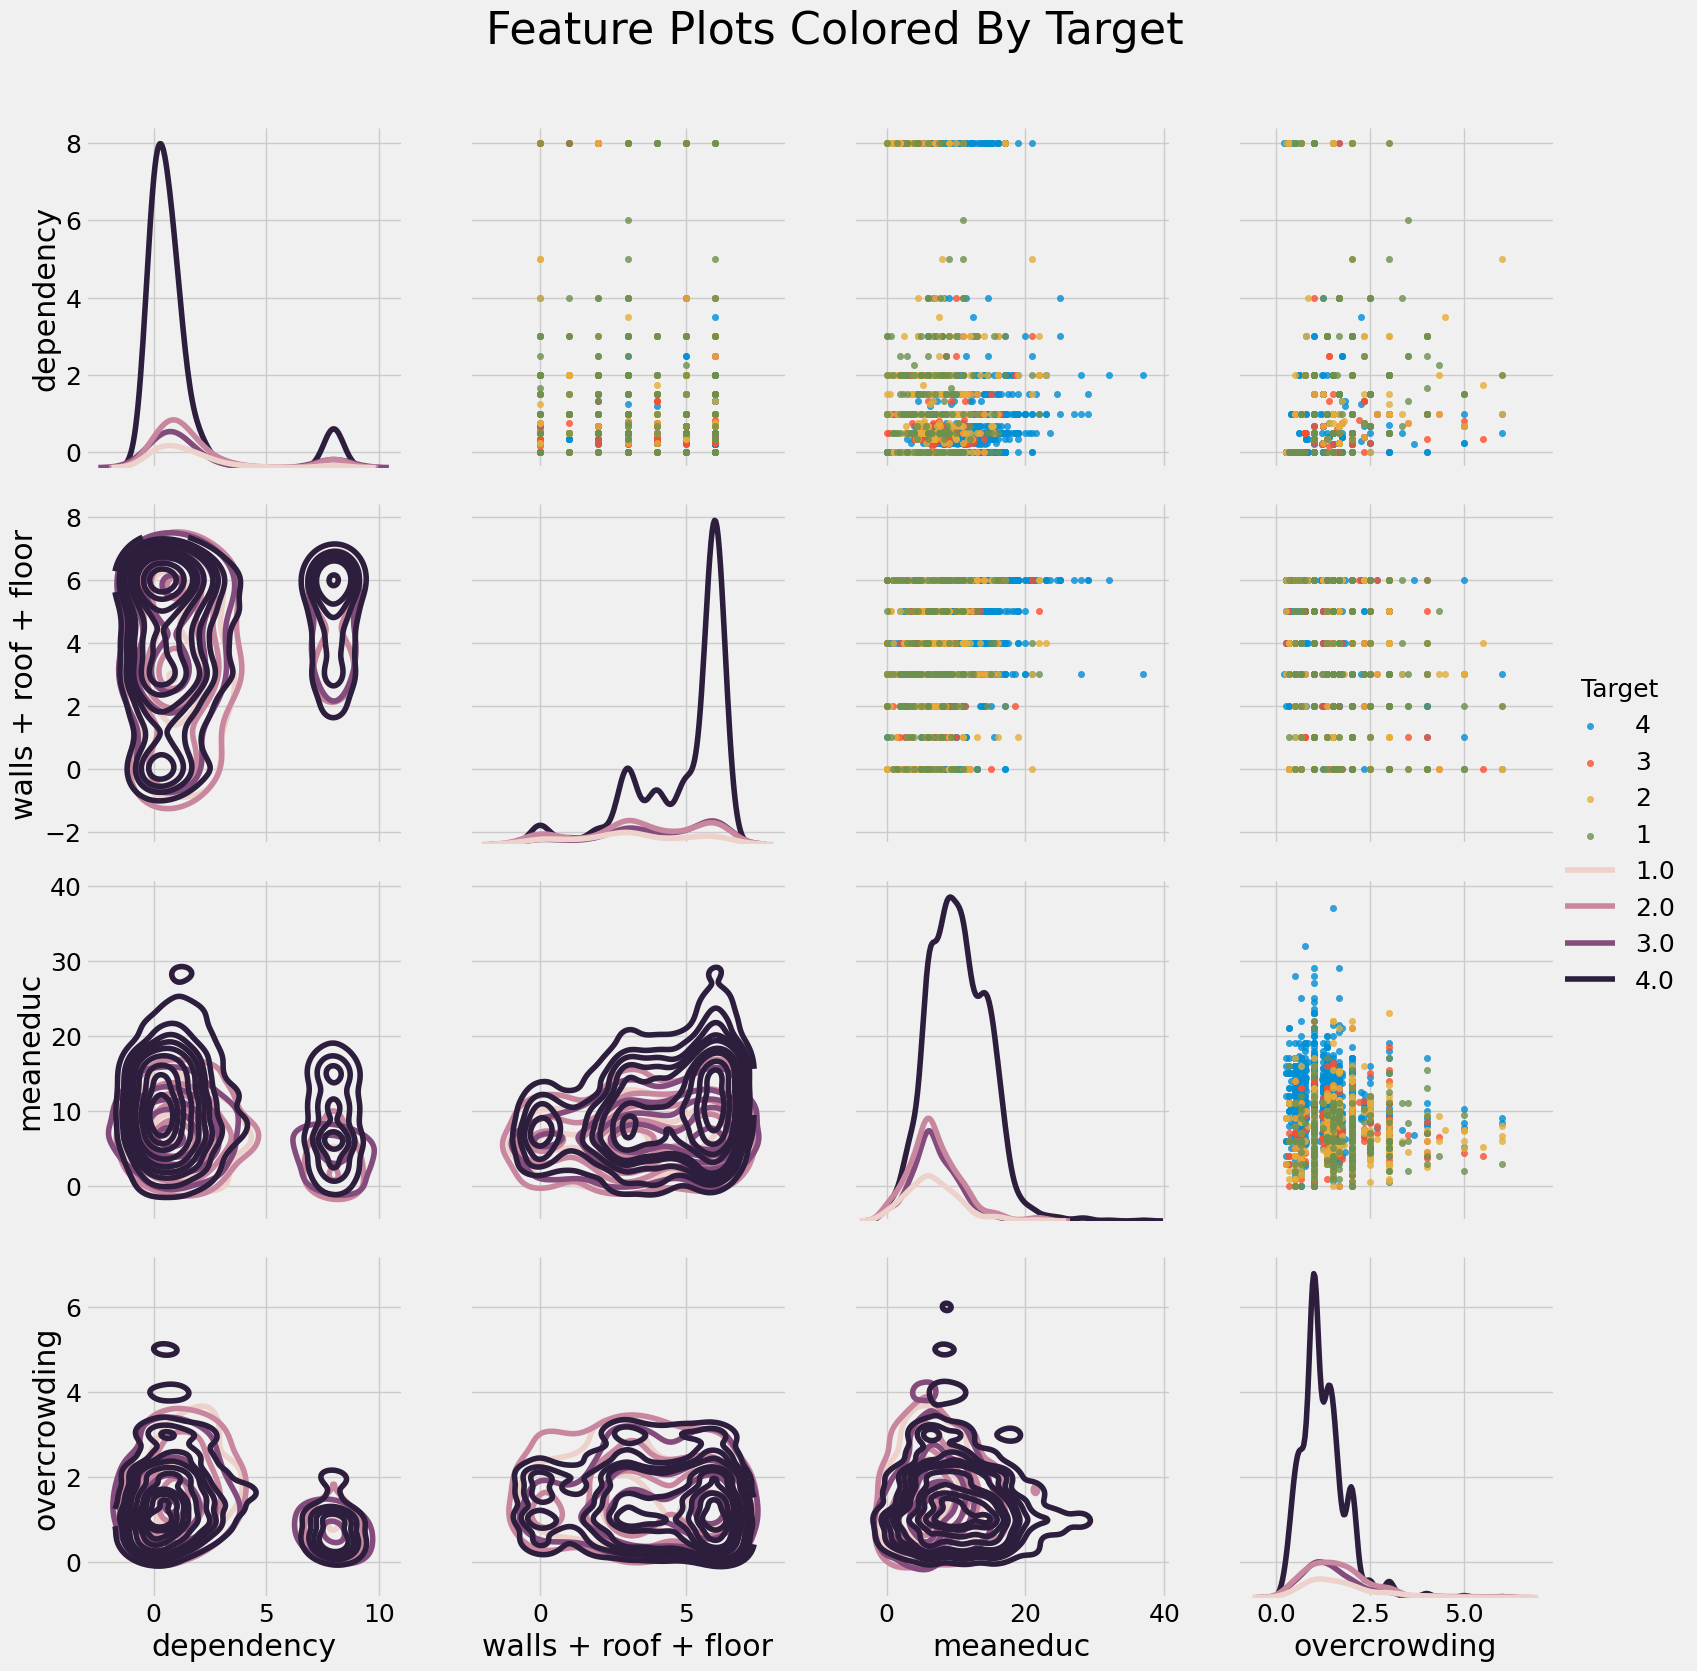

In [73]:
import warnings
warnings.filterwarnings('ignore')

plot_data = train_heads[["Target", "dependency", "walls + roof + floor",
                         "meaneduc", "overcrowding"]]

grid = sns.PairGrid(data= plot_data, height = 4, diag_sharey = False, 
                    hue = "Target", hue_order = [4,3,2,1],
                    vars = [x for x in list(plot_data.columns) if x != "Target"])

grid.map_upper(plt.scatter, alpha = 0.8 , s = 20)

grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);


In [74]:
household_feats = list(heads.columns)


In [ ]:


ind = data[id_ + ind_bool + ind_ordered]
data.describe()

In [ ]:
corr_matrix = ind.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

In [ ]:
ind = ind.drop(columns = "male")

In [ ]:
ind[[c for c in ind if c.startswith("inst1")]].head()

In [ ]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)

plot_categoricals('inst', 'Target', ind, annotate = False);

In [ ]:
plt.figure(figsize = (10, 8))
sns.violinplot(x = 'Target', y = 'inst', data = ind);
plt.title('Education Distribution by Target');

In [ ]:
ind["escolari/age"] = ind["escolari"]/ind["age"]

plt.figure(figsize = (10, 8))
sns.violinplot(x = "Target", y = "escolari/age", data = ind)

In [ ]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

In [ ]:
range_ = lambda x:x.max() - x.min()
range_.__name__ = "range_"
#data.idhogar
# ind_tmp = ind.drop(columns = ['Target',"Id"])

# ind_tmp = ind_tmp.groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])

ind_agg = ind.drop(columns = ['Target',"Id"]).groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

In [ ]:
new_col = []
for c in ind_agg.columns.levels[0]:
  for stat in ind_agg.columns.levels[1]:
    new_col.append(f"{c} - {stat}")

ind_agg.columns = new_col
ind_agg.head()

In [ ]:
ind_agg.iloc[:, [0,1,2,3,6,7,8,9]].head()

In [ ]:
corr_matrix = ind_agg.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

#print(f'There are {len(to_drop)} correlated columns to remove.')
to_drop

In [ ]:
# ind_agg = ind_agg.drop(columns = to_drop)
# ind_feats = list(ind_agg.columns)

final = heads.merge(ind_agg, on = "idhogar", how = "left")

print("Final feature shape : ", final.shape)


In [ ]:
corrs = final.corr()["Target"]

In [ ]:
corrs.sort_values().head()

In [ ]:
corrs.sort_values().dropna().tail()

In [36]:
plot_categoricals("escolari-max", "Target", final, annotate=False)

NameError: ignored

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "Target", y='meaneduc', data =final)
plt.xticks([0,1,2,3], poverty_mapping.values())
plt.title("Average Schooling by Target")

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x= "Target", y = "overcrowding", data =final)
plt.xticks([0,1,2,3],poverty_mapping.values())
plt.title("overcrowding by Target")

In [ ]:
head_gender = ind.loc[ind["parentesco1"] == 1, ["idhogar", "female"]]
final = final.merge(head_gender, on = "idhogar", how = "left").rename(columns = {"female": "female-head"})

In [ ]:
final.groupby("female-head")["Target"].value_counts(normalize = True)

In [ ]:
sns.violinplot(x= "female-head", y = "Target", data = final)
plt.title("Target by Female head of households")

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x= "Target", y = "meaneduc", hue = "female-head", data = final)
plt.title('Average Education by Target and Female Head of Household', size = 16);


In [ ]:
final.groupby("female-head")["meaneduc"].agg(["mean", "count"])

In [406]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scorer = make_scorer(f1_score, greater_is_better = True, average = "macro")

In [409]:
train_labels = np.array(list(final[final["Target"].notnull()]["Target"].astype(np.uint8)))

train_set = final[final["Target"].notnull()].drop(columns = ["Id", "idhogar", "Target"])
test_set = final[final["Target"].isnull()].drop(columns = ["Id", "idhogar", "Target"])

submission_base = test[["Id", "idhogar"]].copy()

In [410]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', SimpleImputer(strategy = "median")),
                     ('scaler', MinMaxScaler())])

train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

In [412]:
model = RandomForestClassifier(n_estimators = 100, random_state = 10, n_jobs = -1)
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)
print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3545 with std = 0.0444


In [413]:
model.fit(train_set, train_labels)
feature_importances = pd.DataFrame({"feature" : features, "importance" : model.feature_importances_})
feature_importances.head()

,feature,importance
0,v2a1,0.006384
1,hacdor,0.000562
2,rooms,0.008787
3,hacapo,0.000421
4,v14a,0.000560


In [414]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

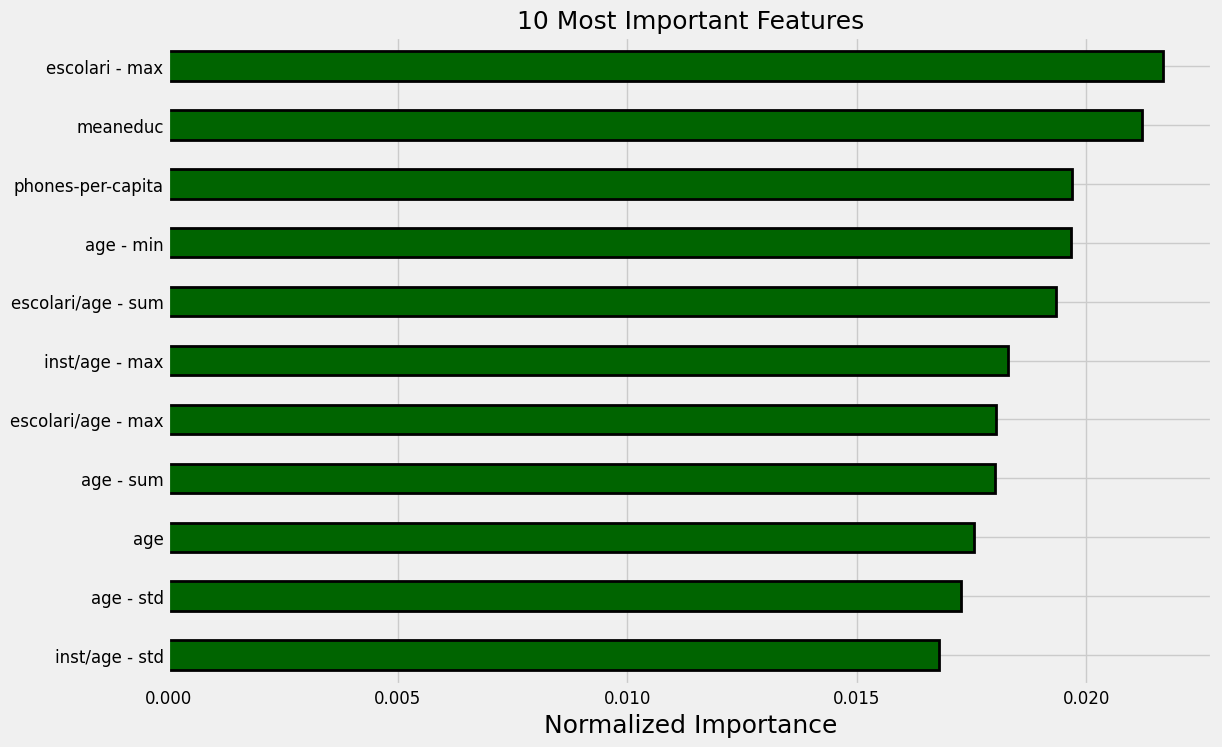

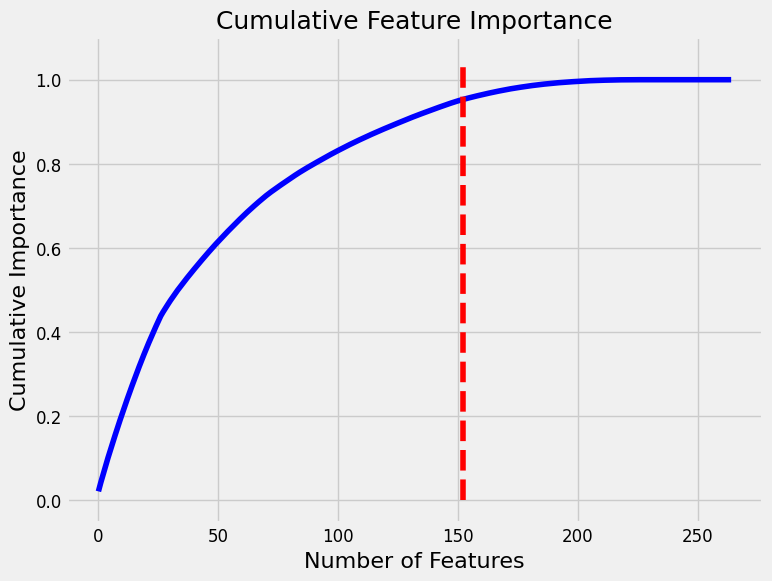

152 features required for 95% of cumulative importance.


In [415]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

In [418]:
def kde_target(df, variable):
  colors = {1:"red", 2:"orange",3:"blue", 4:"green"}
  plt.figure(figsize = (12, 8))

  df = df[df["Target"].notnull()]
  for level in df["Target"].unique():
    subset = df[df["Target"] == level].copy()
    sns.kdeplot(subset[variable].dropna(), 
               label = f"Poverty Level : {level}",
               color = colors[int(subset["Target"].unique())])
  plt.xlabel(variable)
  plt.ylabel("Density")
  plt.title('{} Distribution'.format(variable.capitalize()));



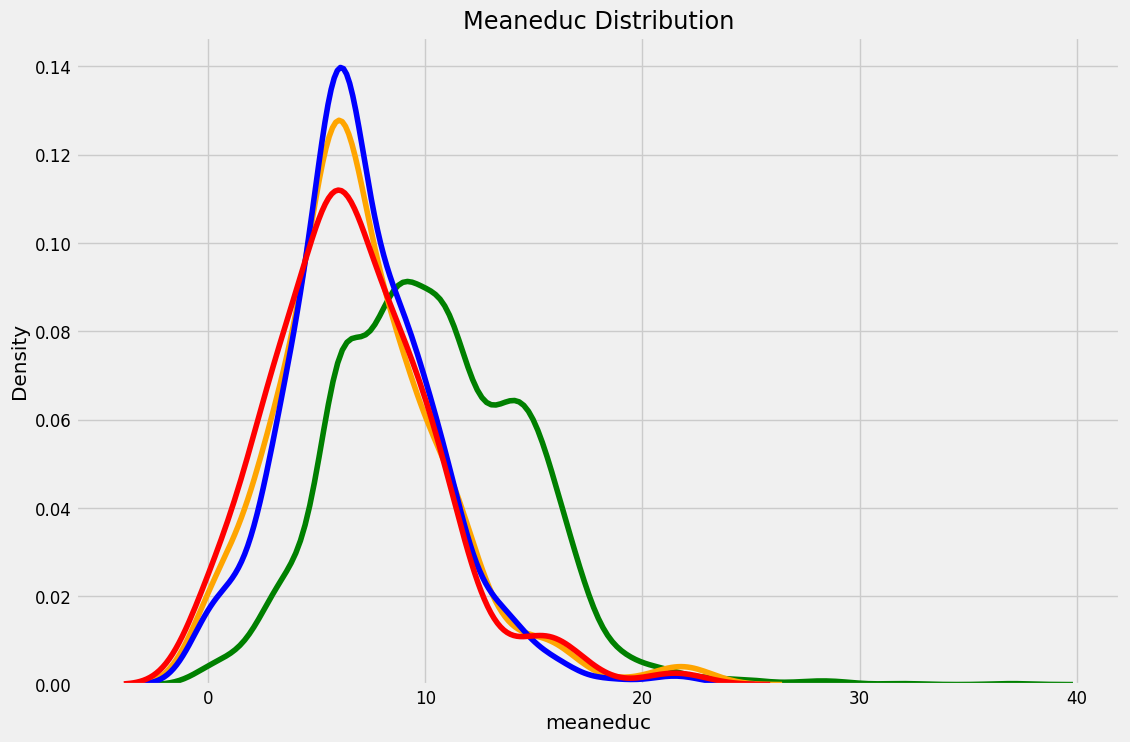

In [419]:
kde_target(final, "meaneduc")

In [420]:
kde_target(final, 'escolari/age-range_')


KeyError: ignored

<Figure size 1200x800 with 0 Axes>

In [422]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# LinearSVC: 선형 SVM(Support Vector Machine) 알고리즘으로, 선형 결정 경계를 이용한 이진 분류에 사용됩니다.

# GaussianNB: 가우시안 나이브 베이즈(Naive Bayes) 알고리즘으로, 각 클래스의 특성이 가우시안 분포를 따른다고 가정하고 베이즈 정리를 적용하여 분류합니다.

# MLPClassifier: 다층 퍼셉트론(Multi-layer Perceptron) 알고리즘으로, 여러 개의 뉴런으로 구성된 인공 신경망을 이용한 분류에 사용됩니다.

# LogisticRegressionCV: 로지스틱 회귀(Logistic Regression) 알고리즘으로, 로지스틱 함수를 이용한 이진 분류에 사용됩니다. CV는 교차 검증(Cross Validation)을 의미합니다.

# RidgeClassifierCV: 릿지 회귀(Ridge Regression) 알고리즘으로, L2 규제를 이용하여 분류합니다. CV는 교차 검증(Cross Validation)을 의미합니다.

# LinearDiscriminantAnalysis: 선형 판별 분석(Linear Discriminant Analysis) 알고리즘으로, 특성 간의 공분산을 고려하여 각 클래스를 분류하는 선형 결정 경계를 찾습니다.

# KNeighborsClassifier: K-최근접 이웃(K-Nearest Neighbors) 알고리즘으로, 가장 가까운 K개의 이웃을 이용하여 분류합니다.

In [425]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

model_results = pd.DataFrame(columns = ["model", "cv_mean", "cv_std"])

def cv_model(train, train_labels, model, name, model_results = None):
  cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring = scorer, n_jobs = -1)
  print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')

  if model_results is not None:
    model_results = model_results.append(pd.DataFrame({"model":name,
                                                       "cv_mean" : cv_scores.mean(),
                                                       "cv_std" : cv_scores.std()},
                                                      index = [0]),
                                         ignore_index = True)
    return model_results

In [426]:
model_results = cv_model(train_set, train_labels, LinearSVC(), "LSVC", model_results)

10 Fold CV Score: 0.28407 with std: 0.03994


In [428]:
model_results = cv_model(train_set, train_labels, GaussianNB(), "GNB", model_results)

10 Fold CV Score: 0.18814 with std: 0.04776


In [429]:
model_results = cv_model(train_set, train_labels, MLPClassifier(hidden_layer_sizes = (32,64,128, 64,32)), "MLP", model_results)

10 Fold CV Score: 0.30692 with std: 0.05804


In [430]:
model_results = cv_model(train_set, train_labels, LinearDiscriminantAnalysis(), "LDA", model_results)

10 Fold CV Score: 0.32308 with std: 0.06393


In [431]:
model_results = cv_model(train_set, train_labels, RidgeClassifier(), "RIDGE", model_results)

10 Fold CV Score: 0.28173 with std: 0.04557


In [432]:
for n in [5,10,20]:
  print(f'\nKNN with {n} neighbors\n')
  model_results = cv_model(train_set, train_labels, KNeighborsClassifier(n_neighbors = n),
                           f'knn-{n}', model_results)



KNN with 5 neighbors

10 Fold CV Score: 0.33315 with std: 0.01676

KNN with 10 neighbors

10 Fold CV Score: 0.33761 with std: 0.03723

KNN with 20 neighbors

10 Fold CV Score: 0.31892 with std: 0.04691


In [433]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels,
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         "EXT", model_results)

10 Fold CV Score: 0.33199 with std: 0.04659


In [434]:
model_results = cv_model(train_set, train_labels, 
                         RandomForestClassifier(100, random_state = 10),
                         "RF", model_results)

10 Fold CV Score: 0.35451 with std: 0.04441


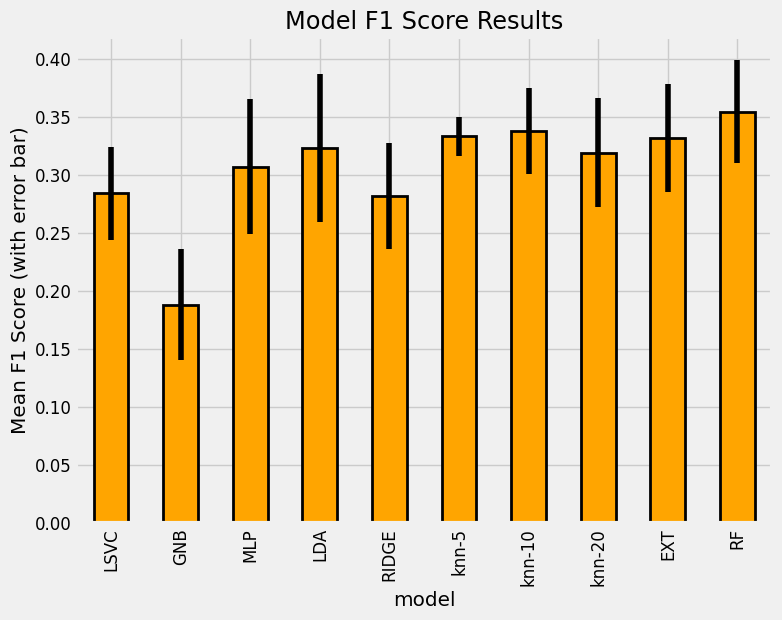

In [435]:
model_results.set_index("model", inplace = True)
model_results["cv_mean"].plot.bar(color="orange", figsize=(8,6),
                                  yerr = list(model_results["cv_std"]),
                                  edgecolor = "k", linewidth = 2)

plt.title("Model F1 Score Results")
plt.ylabel("Mean F1 Score (with error bar)")
model_results.reset_index(inplace = True)

In [436]:
test_ids = list(final.loc[final["Target"].isnull(), 'idhogar'])

In [439]:
def submit(model, train, train_labels, test, test_ids):
    """Train and test a model on the dataset"""
    
    # Train on the data
    model.fit(train, train_labels)
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar': test_ids,
                               'Target': predictions})

     # Make a submission dataframe
    submission = submission_base.merge(predictions, 
                                       on = 'idhogar',
                                       how = 'left').drop(columns = ['idhogar'])
    
    # Fill in households missing a head
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)

    return submission 

In [440]:
rf_submission = submit(RandomForestClassifier(n_estimators = 100, random_state=10, n_jobs = -1),train_set, train_labels, test_set, test_ids)
rf_submission.to_csv("rf_submission.csv", index = False)

In [441]:
train_set = pd.DataFrame(train_set, columns = features)

corr_matrix = train_set.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column])> 0.95)]
to_drop

['coopele',
 'female_x',
 'elec',
 'v18q - min',
 'v18q - count',
 'female - sum',
 'estadocivil3 - max',
 'mobilephone - min',
 'female_y',
 'female-head']

In [442]:
train_set = train_set.drop(columns = to_drop)
train_set.shape

(2973, 255)

In [443]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = "inner")
features = list(train_set.columns)

In [445]:

from sklearn.feature_selection import RFECV

estimator = RandomForestClassifier(random_state =10, n_estimators = 100, n_jobs = -1)
selector = RFECV(estimator, step =1, cv = 3, scoring = scorer, n_jobs = -1)

In [446]:
selector.fit(train_set, train_labels)

RFECV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
      n_jobs=-1, scoring=make_scorer(f1_score, average=macro))

In [ ]:
plt.plot(selector.grid_scores_)
plt.xlabel("Number of Features")
plt.ylabel("Macro F1 Score")
plt.title("Feature Selection Scores")
selector.n_features_

In [ ]:
rankings = pd.DataFrame({"feature":list(train_set.columns), "rank":list(selector.ranking_)}).sort_values("rank")
rankings.head(10)

In [ ]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [75]:
selected_features = train_set.columns[np.where(selector.ranking==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)


NameError: ignored

In [76]:
model_results = cv_model(train_selected, train_labels, model, "RF_SEL", model_results)


NameError: ignored

In [77]:
model_results.set_index("model", inplace = True) #모델을 열로 선택
model_results["cv_mean"].plot.bar(color = "orange" , figsize = (8,6), 
                                  yerr = list(model_results["cv_std"]),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
#index 초기화
model_results.reset_index(inplace = True)

NameError: ignored

In [78]:
def macro_f1_score(labels , predictions):
  predictions = predictions.reshape(len(np.unique(labels)), -1).argmax(axis = 0)
  metric_value = f1_score(labels, predictions, average = "macro")
  return "macro_f1", metric_value, True



In [79]:
from sklearn.model_selection import StratifiedGroupKFold
import lightgbm as lgb
from IPython.display import display

def model_gbm(features, labels, test_features, test_ids,
              nfolds = 5, return_preds = False, hyp = None):
  features_names = list(features.columns)
  if hyp is not None:
    if "n_estimators" in hyp:
      del hyp["n_estimators"]
    params = hyp

  else:
    params = {"boosting_type" : "dart", 
              "colsample_bytree" : 0.88,
              "learning_rate" : 0.028,
              "min_child_samples" : 10,
              "num_leaves" : 36,
              "reg_alpha" : 0.76,
              'reg_lambda': 0.43, 
              'subsample_for_bin': 40000, 
              'subsample': 0.54, 
              'class_weight': 'balanced'
              }
  model = lgb.LGBMClassifier(**params, objective = "multiclass",
                             n_jobs = -1, n_estimators = 10000,
                             random_state = 10)
  
  skrtfold = StratifiedKFold(n_splits = nfolds , shuffle = True)

  predictions = pd.DataFrame()
  importances = np.zeros(len(features_names))

  features = np.array(features)
  test_features = np.array(test_features)
  labels = np.array(labels).reshape((-1))

  valid_scores = []
  for i, (train_indices, valid_indices) in enumerate(skrtfold.split(features, labels)):
    fold_predictions = pd.DataFrame()

    X_train = features[train_indices]
    X_valid = features[valid_indices]
    y_train = labels[train_indices]
    y_valid = labels[valid_indices]

    model.fit(X_train, y_train, early_stopping_rounds = 100,
              eval_metric = macro_f1_score, 
              eval_set = [(X_train, y_train), (X_valid, y_valid)],
              eval_names = ["train", 'valid'],
              verbose = 200)
    valid_scores.append(model.best_score_["valid"]["macro_f1"])
    fold_probabilities = model.predict_proba(test_features)

    for j in range(4):
      fold_predictions[(j+1)] = fold_probabilities[:,j]

    fold_predictions["idhogar"] = test_ids
    fold_predictions["fold"] = (i+1)

    predictions = predictions.append(fold_predictions)
    importances += model.feature_importances_/nfolds

    display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances
    
    predictions = predictions.groupby("idhogar", as_index = False).mean()

    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ["fold"])

    submission = submission_base.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)

    return submission, feature_importances, valid_scores

In [80]:
%%capture --no-display
predictions, gbm_fi = model_gbm(train_set, train_labels, test_set, test_ids, return_preds = True)

NameError: ignored

In [81]:
plt.rcParams["font.size"] = 18
g = sns.FaceGrid(predictions, row = "fold", hue = "Target", size = 3, aspect = 4)
g.map(sns.kdeplot, "confidence")
g.add_legend()
plt.suptitle('Distribution of Confidence by Fold and Target', y = 1.05);


AttributeError: ignored

In [82]:
plt.figure(figsize = (24,12))
sns.violinplot(x= "Target", y = "confidence", hue = "fold", data = predictions)

NameError: ignored

<Figure size 2400x1200 with 0 Axes>

In [83]:
predictions = predictions.groupby('idhogar', as_index = False).mean()

predictions["Target"] = predictions[[1,2,3,4]].idxmax(axis = 1)
predictions["confidence"] = predictions[[1,2,3,4]].max(axis = 1)
predictions = predictions.drop(columns = ["fold"])

plt.figure(figsize = (10,6))
sns.boxplot(x= "Target" , y = "confidence", data = predictions)
plt.title("Confidence by Target")

plt.figure(figsize = (10,6))
sns.violinplot(x= "Target", y = "confidence", data = predictions)
plt.title("Confidence by Target")

NameError: ignored

In [84]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids,
                                             return_preds = False)
submission.to_csv("gbm_baseline.csv")

NameError: ignored

In [85]:
_ = plot_feature_importances(gbm_fi, threshold = 0.95)

NameError: ignored

In [86]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM", "GBM_SEL"], 
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std':  [valid_scores.std(), valid_scores_selected.std()]}),
                                                sort = True)

NameError: ignored

In [87]:
model_results.set_index("model", inplace = True)
#err은 error bar를 그리기 위한 인수입니다
#분산 등등
model_results["cv_mean"].plot.bar(color = "orange", figsize = (8,6),
                                  yerr = list(model_results["cv_std"]), edgecolor = "k", linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

NameError: ignored

In [89]:
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample
import csv
import ast
from timeit import default_timer as timer

In [90]:
def objective(hyperparameters, nfolds=5):
    """Return validation score from hyperparameters for LightGBM"""
    
    # Keep track of evals
    global ITERATION
    ITERATION += 1
    
    # Retrieve the subsample
    #get : dictionary의 키를 가져오는 것, 없으면 1을 넣는다.
    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    subsample_freq = hyperparameters['boosting_type'].get('subsample_freq', 0)
    
    boosting_type = hyperparameters['boosting_type']['boosting_type']
    
    if boosting_type == 'dart':
        hyperparameters['drop_rate'] = hyperparameters['boosting_type']['drop_rate']
    
    # Subsample and subsample frequency to top level keys
    hyperparameters['subsample'] = subsample
    hyperparameters['subsample_freq'] = subsample_freq
    hyperparameters['boosting_type'] = boosting_type
    
    # Whether or not to use limit maximum depth
    if not hyperparameters['limit_max_depth']:
        hyperparameters['max_depth'] = -1
    
    # Make sure parameters that need to be integers are integers
    #정수로 바꿔주기.
    for parameter_name in ['max_depth', 'num_leaves', 'subsample_for_bin', 
                           'min_child_samples', 'subsample_freq']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])
    
    #지우기
    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    #교차 검증
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Convert to arrays for indexing
    features = np.array(train_selected)
    labels = np.array(train_labels).reshape((-1 ))
    
    valid_scores = []
    best_estimators = []
    run_times = []
    
    model = lgb.LGBMClassifier(**hyperparameters, class_weight = 'balanced',
                               n_jobs=-1, metric = 'None',
                               n_estimators=10000)
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        start = timer()
        # Train with early stopping
        #100번 되면 멈춘다.
        #eval_metric = 조기 종료하기 위해서...
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score, 
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 400)
        end = timer()
        # Record the validation fold score
        #최고 점수를 넣고
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        #성능이 제일 좋았던 횟수를 넣고.
        best_estimators.append(model.best_iteration_)
        
        run_times.append(end - start)
    
    score = np.mean(valid_scores)
    score_std = np.std(valid_scores)
    loss = 1 - score
    
    #훈련시간 평균 구하기
    run_time = np.mean(run_times)
    run_time_std = np.std(run_times)
    
    estimators = int(np.mean(best_estimators))
    hyperparameters['n_estimators'] = estimators
    
    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, score, score_std])
    of_connection.close()
    
    # Display progress
    if ITERATION % PROGRESS == 0:
        display(f'Iteration: {ITERATION}, Current Score: {round(score, 4)}.')
    
    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'time': run_time, 'time_std': run_time_std, 'status': STATUS_OK, 
            'score': score, 'score_std': score_std}

In [91]:
# Define the search space
space = {
    'boosting_type': hp.choice('boosting_type', 
                              [{'boosting_type': 'gbdt', 
                                'subsample': hp.uniform('gdbt_subsample', 0.5, 1),
                                'subsample_freq': hp.quniform('gbdt_subsample_freq', 1, 10, 1)}, 
                               {'boosting_type': 'dart', 
                                 'subsample': hp.uniform('dart_subsample', 0.5, 1),
                                 'subsample_freq': hp.quniform('dart_subsample_freq', 1, 10, 1),
                                 'drop_rate': hp.uniform('dart_drop_rate', 0.1, 0.5)},
                                {'boosting_type': 'goss',
                                 'subsample': 1.0,
                                 'subsample_freq': 0}]),
    'limit_max_depth': hp.choice('limit_max_depth', [True, False]),
    'max_depth': hp.quniform('max_depth', 1, 40, 1),
    'num_leaves': hp.quniform('num_leaves', 3, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', 
                                   np.log(0.025), 
                                   np.log(0.25)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 2000, 100000, 2000),
    'min_child_samples': hp.quniform('min_child_samples', 5, 80, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.5, 1.0)
}

In [92]:
sample(space)

{'boosting_type': {'boosting_type': 'dart',
  'drop_rate': 0.23431748801869837,
  'subsample': 0.5073249812187345,
  'subsample_freq': 4.0},
 'colsample_bytree': 0.6106466628094491,
 'learning_rate': 0.13781314966200223,
 'limit_max_depth': True,
 'max_depth': 21.0,
 'min_child_samples': 65.0,
 'num_leaves': 21.0,
 'reg_alpha': 0.9698586816810154,
 'reg_lambda': 0.6427996026450976,
 'subsample_for_bin': 18000.0}

In [93]:
algo = tpe.suggest

In [94]:
#이 코드는 Trials 객체를 생성하고, 목적 함수에서 반환된 결과를 저장하기 위한 것입니다. 
trials = Trials()
#Trials 객체: 목적 함수에서 반환된 모든 것을 저장합니다.

OUT_FILE = "optimization.csv"
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

MAX_EVALS = 100
PROGRESS = 10
N_FOLDS = 5
ITERATION = 0

headers = ["loss", "hyperparameter", "iteration", "runtime", 'score', 'std']
writer.writerow(headers)
of_connection.close

<function TextIOWrapper.close()>

In [95]:
%%capture --no-display
display("Running Optimization for {} Trials.".format(MAX_EVALS))

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, trials = trials,
            max_evals = MAX_EVALS)

'Running Optimization for 100 Trials.'

ERROR:hyperopt.fmin:job exception: name 'StratifiedKFold' is not defined


NameError: ignored

In [96]:
#나중에 사용하기 위해, Trials 객체는 json으로 저장될 수 있습니다.
import json

# Save the trial results
with open('trials.json', 'w') as f:
    f.write(json.dumps(str(trials)))

In [97]:
results = pd.read_csv(OUT_FILE).sort_values('loss', ascending = True).reset_index()
results.head()

EmptyDataError: ignored

In [98]:
plt.figure(figsize = (8, 6))
sns.regplot('iteration', 'score', data = results);
plt.title("Optimization Scores");
plt.xticks(list(range(1, results['iteration'].max() + 1, 3)));

NameError: ignored

<Figure size 800x600 with 0 Axes>

In [99]:
#ast.literal_eval()는 문자열을 Python 리터럴 구조
best_hyp = ast.literal_eval(results.loc[0, 'hyperparameters'])
best_hyp

NameError: ignored

In [100]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_selected, train_labels, test_selected,
                                             test_ids, nfolds = 10, return_preds = False)
model_results = model_results.append(pd.DataFrame({'model' : ["GBM_OPT_10Fold_SEL"],
                                                   "cv_mean" : [valid_scores.mean()],
                                                   "cv_std" : [valid_scores_std()]}),
                                     sort=True).sort_values("cv_mean", ascending = False)

NameError: ignored

In [101]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set,
                                             test_ids, nfolds = 10, return_preds = False)
model_results = model_results.append(pd.DataFrame({'model' : ["GBM_OPT_10Fold"],
                                                   "cv_mean" : [valid_scores.mean()],
                                                   "cv_std" : [valid_scores_std()]}),
                                     sort=True).sort_values("cv_mean", ascending = False)

NameError: ignored

In [102]:
preds = submission_base.merge(submission, on="Id", how = "left")
preds = pd.DataFrame(preds.groupby("idhogar")["Target"].mean())

fig, axes = plt.subplots(1,2,sharey = True, figsize = (12, 6))
heads["Target"].sort_index().plot.hist(normed = True, edgecolor = r"k",
                                       linewidth = 2,
                                       ax = axes[0])

axes[0].set_xticks([1,2,3,4])
axes[0].set_xticklabels(poverty_mapping.values(), rotation = 60)
axes[0].set_title("Train Label Distribution")

preds["Target"].sort_index().plot.hist(normed = True,
                                       edgecolor = 'k',
                                       linewidth = 2,
                                       ax = axes[1])

axes[1].set_xticks([1,2,3,4])
axes[1].set_xticklabels(poverty_mapping.values(), rotation = 60)
plt.subplots_adjust()
axes[1].set_title("Train Label Distribution")


NameError: ignored

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_valid,y_train, y_valid = train_test_split(train_selected, train_labels, test_size = 1000, random_state = 10)

model = lgb.LGBMClassifier(**best_hyp, class_weight = "balanced", random_state = 10)
model.fit(X_train, y_train)

NameError: ignored

In [105]:
valid_preds = model.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns = [1,2,3,4])
preds_df["prediction"] = preds_df[[1,2,3,4]].idxmax(axis = 1)
preds_df["confidence"] = preds_df[[1,2,3,4]].max(axis = 1)

preds_df.head()

NameError: ignored

In [106]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes , normalize = False, title = "Confusion matrix",
                          cmap = plt.cm.Oranges):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized. confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.figure(figsize = (10,10))
  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, size = 24)
  plt.colorbar(aspect = 4)
  tick_marks = np.arrage(len(classes))
  plt.xticks(tick_marks, classes, rotation=45, size = 14)
  plt.yticks(tick_marks, classes, size = 14)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  
  # Labeling the plot
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
      
  plt.grid(None)
  plt.tight_layout()
  plt.ylabel('True label', size = 18)
  plt.xlabel('Predicted label', size = 18)


In [107]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

NameError: ignored

In [108]:
plot_confusion_matrix(cm, normalize = True,
                      classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

NameError: ignored

In [109]:
from umap import UMAP
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE

n_components = 3

umap = UMAP(n_components=n_components)
pca = PCA(n_components=n_components)
ica = FastICA(n_components=n_components)
tsne = TSNE(n_components=n_components)

ModuleNotFoundError: ignored

In [110]:
train_df = train_selected.copy()
test_df = test_selected.copy()

for method, name in zip([umap, pca, ica, tsne], ['umap', 'pca', 'ica', 'tsne']):
  if name == "tsne":
    start = timer()
    reduction = method.fit_transform(train_selected)
    end = timer()
  else:
    start = timer()
    reduction = method.fit_transform(train_selected)
    end = timer()

    test_reduction = method.transform(test_selected)

    test_df['%s_c1' % name] = test_reduction[:, 0]
    test_df['%s_c2' % name] = test_reduction[:, 1]
    test_df['%s_c3' % name] = test_reduction[:, 2]

  # Add components to training data for visualization and modeling
  train_df['%s_c1' % name] = reduction[:, 0]
  train_df['%s_c2' % name] = reduction[:, 1]
  train_df['%s_c3' % name] = reduction[:, 2]
  
  print(f'Method: {name} {round(end - start, 2)} seconds elapsed.')

NameError: ignored

In [111]:
from mpl_toolkits.mplot3d import Axes3D

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map
    Source: https://gist.github.com/jakevdp/91077b0cae40f8f8244a"""

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

cmap = discrete_cmap(4, base_cmap = plt.cm.RdYlBu)

train_df['label'] = train_labels

NameError: ignored

In [112]:
for method, name in zip([umap, pca, ica, tsne], 
                        ['umap', 'pca', 'ica', 'tsne']):
    
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    p = ax.scatter(train_df['%s_c1' % name], train_df['%s_c2'  % name], train_df['%s_c3'  % name], 
                   c = train_df['label'].astype(int), cmap = cmap)
    
    plt.title(f'{name.capitalize()}', size = 22)
    fig.colorbar(p, aspect = 4, ticks = [1, 2, 3, 4])

NameError: ignored

In [113]:
train_df, test_df = train_df.align(test_df, axis = 1, join = 'inner')

%%capture

submission, gbm_fi, valid_scores = model_gbm(train_df, train_labels, 
                                             test_df, test_ids, nfolds = 10,
                                             hyp = best_hyp)

NameError: ignored

In [114]:
submission.to_csv('gbm_opt_10fold_dr.csv', index = False)


NameError: ignored

In [115]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold_DR"], 
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std':  [valid_scores.std()]}),
                                    sort = True)

NameError: ignored

In [116]:
model_results = model_results.sort_values('cv_mean')
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (10, 8),
                                  edgecolor = 'k', linewidth = 2,
                                  yerr = list(model_results['cv_std']))
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

NameError: ignored

In [117]:
_ = plot_feature_importances(gbm_fi)


NameError: ignored